In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import keras 

df = pd.read_pickle('dataset/train_dataset.pkl')
df['Normal/Attack'] = df['Normal/Attack'].apply(lambda x: 0 if x == 'Normal' else 1)

pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None) #50 for truncated view, -1 for full view

In [ ]:

def get_train_test_dataset(df):
    split_date = '2015-12-28 10:29:13'
    data_train = df.loc[df['Timestamp'] <= split_date].copy()
    data_test = df.loc[df['Timestamp'] > split_date].copy()

    return data_train, data_test

In [ ]:
train, test = get_train_test_dataset(df)
test = test.reset_index(drop=True)

train['Normal/Attack'].replace(['Normal', 'Attack'], [0, 1], inplace=True)
test['Normal/Attack'].replace(['Normal', 'Attack'], [0, 1], inplace=True)


## Correlation between feature

In [ ]:

df_corr = pd.read_pickle('dataset/train_dataset.pkl')

In [ ]:
train_corr, test_corr = get_train_test_dataset(df_corr)

In [ ]:
cols_numeric = list(df_corr.columns)
cols_numeric.remove('Timestamp')
cols_numeric.remove('index')
cols_numeric.remove('attack')
cols_numeric.remove('Normal/Attack')

In [ ]:
((len(cols_numeric) * len(cols_numeric) - len(cols_numeric)) /2 ) 

In [ ]:
corr_1 = train_corr[cols_numeric].iloc[0:30].corr()
corr_2 = np.nan_to_num(corr_1)
corr_2.sum()
# 0.9999988623936533

In [ ]:
sorted_list



In [ ]:
correlated_df = pd.DataFrame(columns=['Correlation', 'Feature 1', 'Feature 2'])
for index in range(0, 10):
    for v, i, j in sorted_list:
        # dt_co = train_corr[cols_numeric].iloc[index:index+30].corr()
        # new_corr = dt_co.iloc[i,j]
        correlated_df = pd.concat(objs=[correlated_df, pd.DataFrame(data=[[train_corr[cols_numeric].iloc[index:index+30].corr().iloc[i,j], i, j]], columns=['Correlation', 'Feature 1', 'Feature 2'])], axis=0)
        


In [ ]:
normalization = StandardScaler()
df_normalized = normalization.fit_transform(df_corr[cols_numeric])
df_normalized = pd.DataFrame(df_normalized) # columns=cols_numeric

In [ ]:

for i, j in zip(correlated_df['Feature 1'], correlated_df['Feature 2']):
    fig, ax = plt.subplots(figsize=(20,5))

    plt.plot(np.abs(df_normalized[i] - df_normalized[j]), color='blue', linewidth=0.2)
    plt.plot(df_normalized[i], color='red', linewidth=0.2)
    plt.show()

In [ ]:

    # np.nan_to_num()[np.triu_indices(len(cols_numeric), k = 1)]

In [ ]:
correlations = pd.DataFrame(columns=['corr'])

for i in range(0, 1000):
    
    correlations = pd.concat([correlations, pd.DataFrame({'corr': }, index=[0])], ignore_index=True)

In [ ]:
data_cor = train_corr[cols_numeric].corr()
# Set the threshold and add to pairs to list
t = 0.95
cor_list = []

#Find Pairs and update cor_list
for i in range(0,len(data_cor)-1):
    for j in range(i+1,len(data_cor)):
        correlation = data_cor.iloc[i,j] #Find correlation between two columns
        if correlation >= t or correlation <= -t:
            cor_list.append([data_cor.iloc[i,j], i, j])

#Sort by corr coef
sorted_list = sorted(cor_list,key=lambda x: -abs(x[0]))

In [ ]:

for v,i,j in sorted_list:
    print ("%s and %s = %.5f" % (cols_numeric[i], cols_numeric[j], v))
    fig, ax = plt.subplots(figsize=(20,5))
    plt.plot(train_corr[cols_numeric].iloc[:,i], label=cols_numeric[i], markersize=0.2, color='blue', alpha=0.5, linestyle='None', marker='o', mew=1)
    plt.plot(train_corr[cols_numeric].iloc[:,j], label=cols_numeric[i], markersize=0.1, color='green', alpha=0.5, linestyle='None', marker='o', mew=1)
    plt.show()
    

In [ ]:

for v,i,j in sorted_list:
    print ("%s and %s = %.5f" % (cols_numeric[i], cols_numeric[j], v))
    fig, ax = plt.subplots(figsize=(20,5))
    plt.plot(train_corr[cols_numeric].iloc[:,i], label=cols_numeric[i], markersize=0.2, color='blue', alpha=0.5, linestyle='None', marker='o', mew=1)
    plt.plot(train_corr[cols_numeric].iloc[:,j], label=cols_numeric[i], markersize=0.1, color='green', alpha=0.5, linestyle='None', marker='o', mew=1)
    plt.show()
    

In [ ]:
sorted_list

In [ ]:
cols_numeric = list(df.columns)
cols_numeric.remove('Timestamp')
cols_numeric.remove('index')
cols_numeric.remove('attack')

# for col in cols_continuous_tank:
#     cols_numeric.remove(col)

cols_discrete = []
cols_continuous = []

for col in cols_numeric:
    
    if len(df[col].unique()) <= 5:
        cols_discrete.append(col)
    else:
        cols_continuous.append(col)

# for col in cols_continuous_tank:
#     cols_discrete.remove(f'{col}_discrete')

In [ ]:
data_cor = train_corr[cols_continuous].corr()
# Set the threshold and add to pairs to list
t = 0.95
cor_list = []

#Find Pairs and update cor_list
for i in range(0,len(data_cor)-1):
    for j in range(i+1,len(data_cor)):
        correlation = data_cor.iloc[i,j] #Find correlation between two columns
        if correlation >= t or correlation <= -t:
            cor_list.append([data_cor.iloc[i,j], i, j])

#Sort by corr coef
sorted_list_cols_continuous = sorted(cor_list,key=lambda x: -abs(x[0]))

In [ ]:
sorted_list_cols_continuous

In [ ]:
for v,i,j in sorted_list_cols_continuous:
    print ("%s and %s = %.5f" % (cols_continuous[i], cols_continuous[j], v))
    fig, ax = plt.subplots(figsize=(20,5))
    plt.plot(train_corr[cols_continuous].iloc[:,i], label=cols_continuous[i], markersize=0.2, color='blue', alpha=0.5, linestyle='None', marker='o', mew=1)
    plt.plot(train_corr[cols_continuous].iloc[:,j], label=cols_continuous[i], markersize=0.1, color='green', alpha=0.5, linestyle='None', marker='o', mew=1)
    plt.show()


## Plot All normalization data

In [ ]:
cols_numeric = list(df.columns)
cols_numeric.remove('Timestamp')
cols_numeric.remove('index')
cols_numeric.remove('attack')

df['Normal/Attack'].replace(['Normal', 'Attack'], [0, 1], inplace=True)


In [ ]:

from sklearn.decomposition import PCA
number_dim = 5

X_norm = (df[cols_numeric] - df[cols_numeric].min())/(df[cols_numeric].max() - df[cols_numeric].min())
X_norm = X_norm.fillna(0)

pca = PCA(n_components=number_dim) 
transformed = pd.DataFrame(pca.fit_transform(X_norm))

transformed['Attack/Normal'] = df['Normal/Attack']
transformed['Timestamp'] = df['Timestamp']

columns = [i for i in range(number_dim)]

In [ ]:

# transformed_state = pd.DataFrame(pca.fit_transform(X_norm.iloc[450000:450008]))

In [ ]:
transformed_train, transformed_test = get_train_test_dataset(transformed)

In [ ]:
X_norm['Timestamp'] = df['Timestamp']

In [ ]:
X_norm_train, X_norm_test = get_train_test_dataset(X_norm)

In [ ]:
ax, fig = plt.subplots(1, 2, figsize=(20, 8))

plt.rc('xtick', labelsize=5) 
plt.rc('ytick', labelsize=5) 

plt.subplot(1, 2, 1)
sns.heatmap(X_norm_train.corr(), cmap='coolwarm', ax=fig[0])

plt.subplot(1, 2, 2)
sns.heatmap(X_norm_test.corr(),  cmap='coolwarm', ax=fig[1])

In [ ]:

data = transformed_test.iloc[0:20000]


ax, fig = plt.subplots(figsize=(20, 5), dpi=300)
plt.plot(data[columns], alpha=0.5, linewidth=1)

plt.plot(data['Attack/Normal'], alpha=1, linewidth=2, color='red')

In [ ]:
data = transformed_test.iloc[0:20000]
columns = list(np.arange(0, 6, 1))
data['dim'] = data[columns].apply(lambda x: np.mean(x), axis=1)


ax, fig = plt.subplots(figsize=(20, 5), dpi=300)
plt.plot(data[columns + ['dim']], alpha=0.5, linewidth=1)

attack = data['Attack/Normal']
data = (data[columns] - data[columns].min())/(data[columns].max() - data[columns].min())
data['Attack/Normal'] = attack
plt.plot(data['Attack/Normal'], alpha=1, linewidth=2, color='red')
plt.show()

In [ ]:
ax, fig = plt.subplots(figsize=(20, 5))
plt.plot(transformed[columns].iloc[0:20000], alpha=1, linewidth=1)

In [ ]:
ax, fig = plt.subplots(figsize=(20, 5))
plt.plot(X_norm.iloc[0:20000], alpha=1, linewidth=1)

### Get state by quantiles on PCA

In [ ]:
transformed_train, transformed_test = get_train_test_dataset(transformed)

In [ ]:

def get_state(row, quantiles):
    if row <= quantiles[0.25]:
        return 1
    elif row > quantiles[0.25] and row <= quantiles[0.5]:
        return 2
    elif row > quantiles[0.5] and row <= quantiles[0.75]:
        return 3
    elif row > quantiles[0.75]:
        return 4
        
# create discrete variables for the continuous variables based on the quantiles of train set
for col in columns:
    quantiles = transformed_train[col].quantile([0.25, 0.5, 0.75])
    transformed[f'{col}_discrete'] = transformed[col].apply(lambda x: get_state(x, quantiles))
# ~1 min

In [ ]:

def get_state(row, quantiles):
    # point = [i for i in range(quantiles)]
    for i, quantile in enumerate(quantiles):
        if row <= quantile:
            return i
        
    return len(quantiles) - 1

columns = np.arange(0, 5, 1)
# create discrete variables for the continuous variables based on the quantiles of train set
for col in columns:
    quantiles = transformed_train[col].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
    transformed[f'{col}_discrete'] = transformed[col].apply(lambda x: get_state(x, quantiles))
# ~1 min

In [ ]:
transformed_train, transformed_test = get_train_test_dataset(transformed)

In [ ]:

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

cols_keep = [i for i in range(6)]

transformed_train[cols_keep].hist(figsize=(20,10), bins = 50)
plt.show()

In [ ]:
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

cols_keep = [i for i in range(6)] + ['Attack/Normal']

fig, axs = plt.subplots(3, 2, figsize=(20, 10))

r = [axs[i, j] for i in range(3) for j in range(2)]

for i, ax in enumerate(r):
    sns.histplot(data=transformed_train, x=i, kde=True, ax=ax, hue='Attack/Normal', multiple='stack')
    for i in transformed_train[i].quantile([0.01, 0.25, 0.5, 0.75, 0.99]):
        ax.axvline(i, color='red', linestyle='--', linewidth=2)

In [ ]:
quantile_proba = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

cols_keep = [i for i in range(6)] + ['Attack/Normal']

fig, axs = plt.subplots(3, 2, figsize=(20, 10))

r = [axs[i, j] for i in range(3) for j in range(2)]

for i, ax in enumerate(r):
    sns.histplot(data=transformed, x=i, kde=True, ax=ax, hue='Attack/Normal', multiple='stack')
    # ax.set_yscale(value='log')
    for i in transformed_train[i].quantile(quantile_proba):
        ax.axvline(i, color='red', linestyle='--', linewidth=2)

In [ ]:
train, test = get_train_test_dataset(df)

In [ ]:
df.columns

In [ ]:
col_keep = list(df.columns)
col_keep.remove('Timestamp')
col_keep.remove('Normal/Attack')
col_keep.remove('index')
col_keep.remove('attack')

In [ ]:
len(col_keep)

In [ ]:
quantile_proba = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

fig, axs = plt.subplots(9, 5, figsize=(20, 10))

r = [axs[i, j] for i in range(9) for j in range(5)]

for i, ax in zip(col_keep, r):
    sns.histplot(data=df, x=i, kde=True, ax=ax, hue='Normal/Attack', multiple='stack')
    # ax.set_yscale(value='log')
    for i in train[i].quantile(quantile_proba):
        ax.axvline(i, color='red', linestyle='--', linewidth=2)

In [ ]:
fig = plt.figure(figsize=(20,20), dpi=300)
ax = fig.add_subplot(111, projection='3d')

ax.view_init(0, 90)
color_ = ['red' if l == 1 else 'blue' for l in transformed['Attack/Normal']]

ax.scatter(transformed[4], transformed[1], transformed[3], c=color_, s=1, alpha=0.2)

plt.legend()
plt.show()

## MFDFA

In [ ]:
%pip install latex

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from MFDFA import MFDFA
from MFDFA import fgn

In [ ]:
# The total integration time
t_final = 500

# The desired timestep of integration
delta_t = 0.001

# time array of the process
time = np.linspace(0, t_final, t_final * int(1 / delta_t))

# Choose some values for the drift and diffusion
theta = 0.3
sigma = 0.1

# Generate your favourite fractional Gaussian noise with H index
H = 0.7
dB = (t_final ** H) * fgn(N = time.size, H = H)

# Initialise the array y
y = np.zeros([time.size])

# Give some small random initial conditions
y[0]=np.random.normal(size = 1) / 10

# Integrate the process
for i in range(1, time.size):
    y[i] = y[i-1] - theta * y[i-1] * delta_t + sigma * dB[i] 

In [ ]:
#This is the stochastic trajectory over time
plt.plot(time, y, label = r'Trajectory of fOU process')

plt.xlabel(r'time $t$')
plt.ylabel(r'$y(t)$')
plt.legend()
plt.show()

In [ ]:
# Select a band of lags, which usually ranges from 
# very small segments of data, to very long ones, as
lag = np.logspace(0.7, 4, 30).astype(int)
# Notice these must be ints, since these will segment
# the data into chucks of lag size

# Select the power q
q = 2

# The order of the polynomial fitting
order = 1

# Obtain the (MF)DFA as
lag, dfa = MFDFA(df['LIT101'].values, lag = lag, q = q, order = order)


In [ ]:
# To uncover the Hurst index, lets get some log-log plots
plt.loglog(lag, dfa, 'o', label='fOU: MFDFA q=2')

# And now we need to fit the line to find the slope. We will
# fit the first points, since the results are more accurate 
# there. Don't forget that if you are seeing in log-log
# scales, you need to fit the logs of the results
np.polyfit(np.log(lag[:15]), np.log(dfa[:15]),1)[0]
plt.show()
# Now what you should obtain is: slope = H + 1

In [ ]:
# Lets take three examples, with H=0.3, H=0.5, H=0.7
# The total integration time, as before
t_final = 500

# The desired timestep of integration
delta_t = 0.001

# time array of the process
time = np.linspace(0, t_final, t_final * int(1 / delta_t))

# Generate three fractional Gaussian noises dB 
H_anti = 0.3       # Anti-presistent noise
H_regu = 0.5       # Regular noise
H_posi = 0.7       # Positively correlated noise

# Generate the noises (with the appropriate normalisation)
dB_anti = (t_final ** H_anti) * fgn(N = time.size, H = H_anti)
dB_regu = (t_final ** H_regu) * fgn(N = time.size, H = H_regu)
dB_posi = (t_final ** H_posi) * fgn(N = time.size, H = H_posi)

In [ ]:
# Lets take three examples, with H=0.3, H=0.5, H=0.7
# The total integration time, as before
t_final = 500

# The desired timestep of integration
delta_t = 0.001

# time array of the process
time = np.linspace(0, t_final, t_final * int(1 / delta_t))

# Generate three fractional Gaussian noises dB 
H_anti = 0.3       # Anti-presistent noise
H_regu = 0.5       # Regular noise
H_posi = 0.7       # Positively correlated noise

# Generate the noises (with the appropriate normalisation)
dB_anti = (t_final ** H_anti) * fgn(N = time.size, H = H_anti)
dB_regu = (t_final ** H_regu) * fgn(N = time.size, H = H_regu)
dB_posi = (t_final ** H_posi) * fgn(N = time.size, H = H_posi)

In [ ]:
plt.plot(fgn(N = time.size, H = H_anti))
plt.show()

In [ ]:
# Let's plot the noises, and the associated motions

fig, ax = plt.subplots(2,3, figsize=(12,4));

ax[0,0].plot(time, dB_anti)
ax[0,1].plot(time, dB_regu)
ax[0,2].plot(time, dB_posi)

# their motions are given by the integral of the noise,
# i.e., the cumsum of the process

ax[1,0].plot(time, np.cumsum(dB_anti))
ax[1,1].plot(time, np.cumsum(dB_regu))
ax[1,2].plot(time, np.cumsum(dB_posi))

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,4));

plt.plot(df['Timestamp'], np.cumsum(df['FIT101']))

plt.show()

In [96]:
train, test = get_train_test_dataset(df)

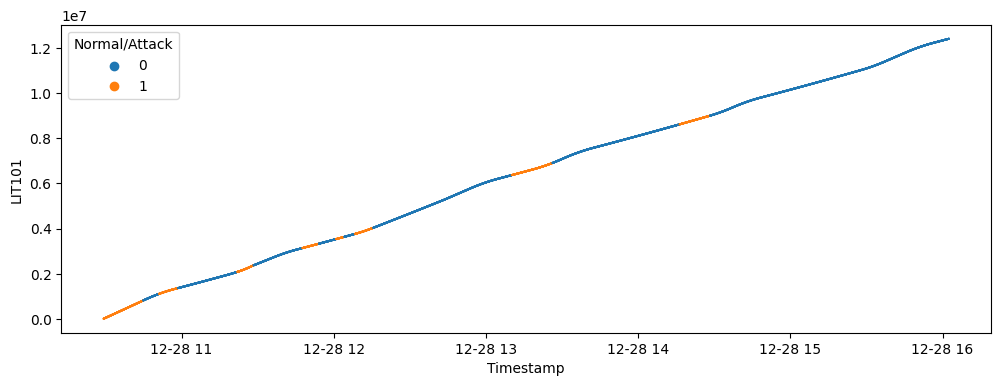

In [100]:
fig, ax = plt.subplots(figsize=(12,4));

data = test.iloc[0:20000]

sns.scatterplot(x=data['Timestamp'], y=np.cumsum(data['LIT101']), hue=data['Normal/Attack'], linewidth=0, alpha=0.5, s=2)
# plt.plot(df['Timestamp'], np.cumsum(df['FIT101']))

plt.show()

# Prophet Facebook

In [ ]:
%pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
train, test = get_train_test_dataset(df)

In [ ]:
m = Prophet(changepoint_range=0.95)

split_date = '2015-12-28 05:29:13'
data_test = df.loc[df['Timestamp'] > split_date].copy()
    
data = data_test[['Timestamp', 'LIT101']].iloc[0:40000]
data.columns = ['ds', 'y']
m.fit(data)

In [ ]:
future = m.make_future_dataframe(periods=119, freq='S')

In [ ]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

In [ ]:
result = pd.concat([data.set_index('ds')['y'], forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']]], axis=1)
fig1 = m.plot(forecast)

In [ ]:
result['error'] = result['y'] - result['yhat']
result['uncertainty'] = result['yhat_upper'] - result['yhat_lower']
result['anomaly'] = result.apply(lambda x: 'Yes' if(np.abs(x['error']) > 1.5*x['uncertainty']) else 'No', axis = 1)
result = result.reset_index()


In [ ]:
result['uncertainty'].plot()

In [ ]:
#visualize the anomaly data
sns.scatterplot(data=result, x='ds', y='y', hue='anomaly', linewidth=0, alpha=0.5, s=2) 


In [ ]:
data_vizu = data_test.iloc[0:40000]
sns.scatterplot(data=data_vizu, x='Timestamp', y='LIT101', hue='Normal/Attack', linewidth=0, alpha=0.5, s=2) 


## Create Sate

In [ ]:
cols_continuous_tank = ['LIT101', 'LIT301', 'LIT401']


In [ ]:

HH=1000
H=800
L=500 
LL=250

def get_level_tank(tank):
    if tank <= LL:
        return 1
    elif tank > LL and tank <= L:
        return 2
    elif tank > L and tank <= H:
        return 3
    elif tank > H and tank <= HH:
        return 4
    elif tank > HH:
        return 5
        

# create discrete variables for the tank levels
for col in cols_continuous_tank:
    df[f'{col}_discrete'] = df[col].apply(get_level_tank)
    

In [ ]:
cols_numeric = list(df.columns)
cols_numeric.remove('Timestamp')
cols_numeric.remove('index')
cols_numeric.remove('attack')

# for col in cols_continuous_tank:
#     cols_numeric.remove(col)

cols_discrete = []
cols_continuous = []

for col in cols_numeric:
    
    if len(df[col].unique()) <= 5:
        cols_discrete.append(col)
    else:
        cols_continuous.append(col)

# for col in cols_continuous_tank:
#     cols_discrete.remove(f'{col}_discrete')

# Get State by slope

In [ ]:
def diff_num(a, n):
    for i in range(n, len(a)):
        if i == 0:
            yield 0
        else:
            yield a[i] - a[i-n]
n = 30

for col in cols_continuous:
    df[f'{col}_discrete'] = [0] * n + [x for x in diff_num(df[col], n)] #1 if x > 0 else -1

In [ ]:
from numpy import diff
n = 1

for col in cols_continuous:
    df[f'{col}_discrete'] = list(np.zeros(n)) + [x for x in diff(df[col], n=n)] #1 if x > 0 else -1

## STL

In [ ]:
%pip install statsmodels

In [ ]:
from statsmodels.tsa.seasonal import STL


split_date = '2015-12-28 05:29:13'
data_test = df.loc[df['Timestamp'] > split_date].copy()
    
data = data_test[['Timestamp', 'LIT101']].iloc[0:40000]

stl = STL(data['LIT101'], period=4000)
result = stl.fit()

In [ ]:
seasonal, trend, resid = result.seasonal, result.trend, result.resid

In [ ]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(df['LIT101'].iloc[0:40000])
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

In [ ]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(data['LIT101'].iloc[0:40000])
plt.plot(estimated)

In [ ]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev

In [ ]:


split_date = '2015-12-28 05:29:13'
data_test = df.loc[df['Timestamp'] > split_date].copy()
    
data = data_test[['Timestamp', 'LIT101', 'Normal/Attack']].iloc[0:40000]

In [ ]:
data['resid'] = resid

In [ ]:
plt.figure(figsize=(10,4))
# plt.plot(resid)
sns.scatterplot(data=data, x=data.index, y='resid', hue="Normal/Attack", linewidth=0, alpha=0.5, s=2)

plt.fill_between([resid.index[0], resid.index[len(resid)-1]], lower, upper, color='g', alpha=0.1, linestyle='--', linewidth=2)

In [ ]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(df['LIT101'], model='multiplicative', period=4000)


In [ ]:
ax=res.plot()
ax.set_size_inches(15, 8)
plt.show()

In [ ]:
np.var(res._weights)

In [ ]:
ax, fig = plt.subplots(4, 1, figsize=(20, 10))

plt.subplot(4, 1, 1)
sns.scatterplot(x=df.index, y=res._observed, linewidth=0, s=1)
plt.subplot(4, 1, 2)
sns.scatterplot(x=df.index, y=res._trend,    linewidth=0, s=1)
plt.subplot(4, 1, 3)
sns.scatterplot(x=df.index, y=res._seasonal, linewidth=0, s=1)
plt.subplot(4, 1, 4)
sns.scatterplot(x=df.index, y=res._resid,    linewidth=0, s=1, hue=df['Normal/Attack'])


## PCA

In [ ]:
n=1
df_copy = df.copy()
for col in cols_continuous:
    df_copy[f'{col}_discrete'] = [0] * n + [x for x in np.diff(df_copy[col], n)] #1 if x > 0 else -1

In [ ]:
cols_numeric = []
for col in df_copy.columns:
    if '_discrete' in col:
        cols_numeric.append(col)

df['Normal/Attack'].replace(['Normal', 'Attack'], [0, 1], inplace=True)


X_norm = (df_copy[cols_numeric] - df_copy[cols_numeric].min())/(df_copy[cols_numeric].max() - df_copy[cols_numeric].min())
X_norm = X_norm.fillna(0)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

transformed['Attack/Normal'] = df_copy['Normal/Attack']
transformed['Timestamp'] = df_copy['Timestamp']

In [ ]:
fig = plt.figure(figsize=(20,20), dpi=300)
ax = fig.add_subplot(111, projection='3d')

ax.view_init(45, 130)
color_ = ['red' if l == 1 else 'blue' for l in transformed['Attack/Normal']]

ax.scatter(transformed[0], transformed[1], transformed[2], c=color_, s=1, alpha=0.2)

plt.legend()
plt.show()

## FFT (Fast Fourier Transform)

In [101]:
# Frequency and sampling rate
f = 10 # frequency
data = train#df.iloc[0:80000]

Fs = len(data) # sampling rate
t = np.arange(0,1,1/Fs)
# Sine function
y = data['LIT101']
# Perform Fourier transform using scipy

y_fft = np.fft.fft(np.array(y))

# Plot data
n = np.size(t)
fr = Fs/2 * np.linspace(0,1,int(Fs/2))
y_m = 2/n * abs(y_fft[0:np.size(fr)])


(2.0, 600.0)

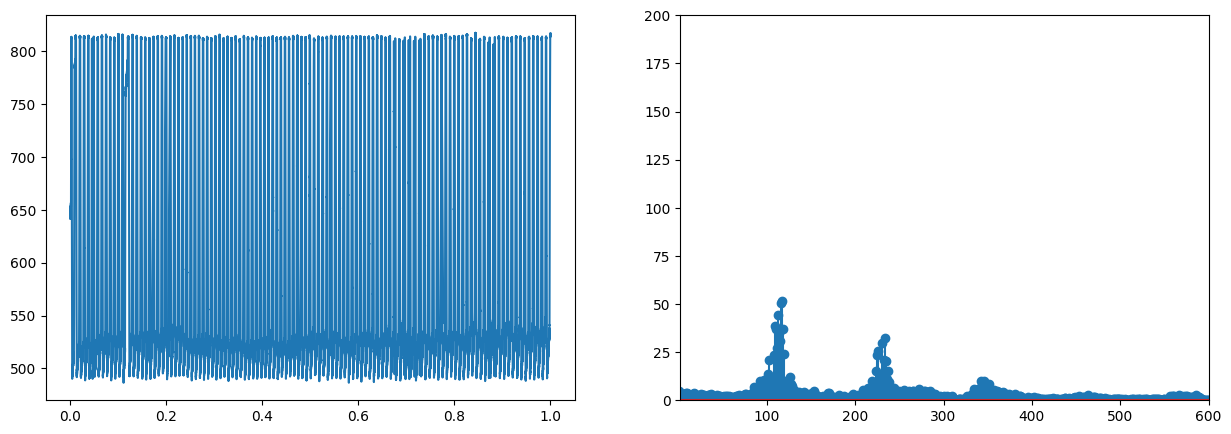

In [102]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].plot(t, y)    # plot time series
ax[1].stem(fr, y_m) # plot freq domain
ax[1].set_ylim([0, 200])
ax[1].set_xlim([2, 600])

In [103]:
y = np.zeros(len(fr))
t = np.arange(0, 1, 1/len(fr))

for freq, amp in zip(fr, y_m):
    if amp > 50 and freq < 600 and freq > 2:
        
        y_t = amp * np.sin(2*np.pi * freq * t)
        # pd.DataFrame(y).plot()
        y += y_t

/Users/david/SWaT_Analysis_TFE/.env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 80.0)

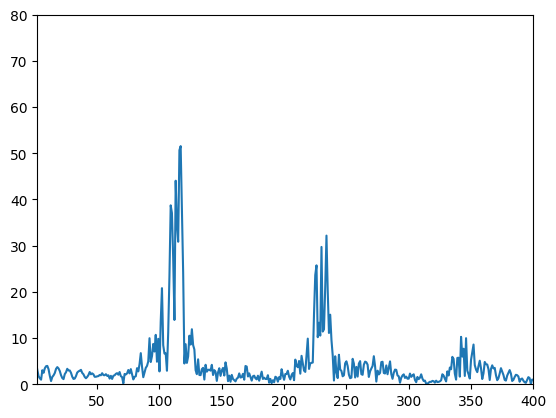

In [104]:
sns.lineplot(fr, y_m)
plt.xlim([2, 400])
plt.ylim([0, 80])

In [ ]:
# Sine function 1:
A1, f1 = 10, 0 # amplitude, frequency
y1 = A1 * np.sin(2*np.pi * f1 * t)

# Sine function 2:
A2, f2 = 100, 18
y2 = A2 * np.sin(2*np.pi * f2 * t)

# Sine function 3:
A3, f3 = 60, 39
y3 = A3 * np.sin(2*np.pi * f3 * t)


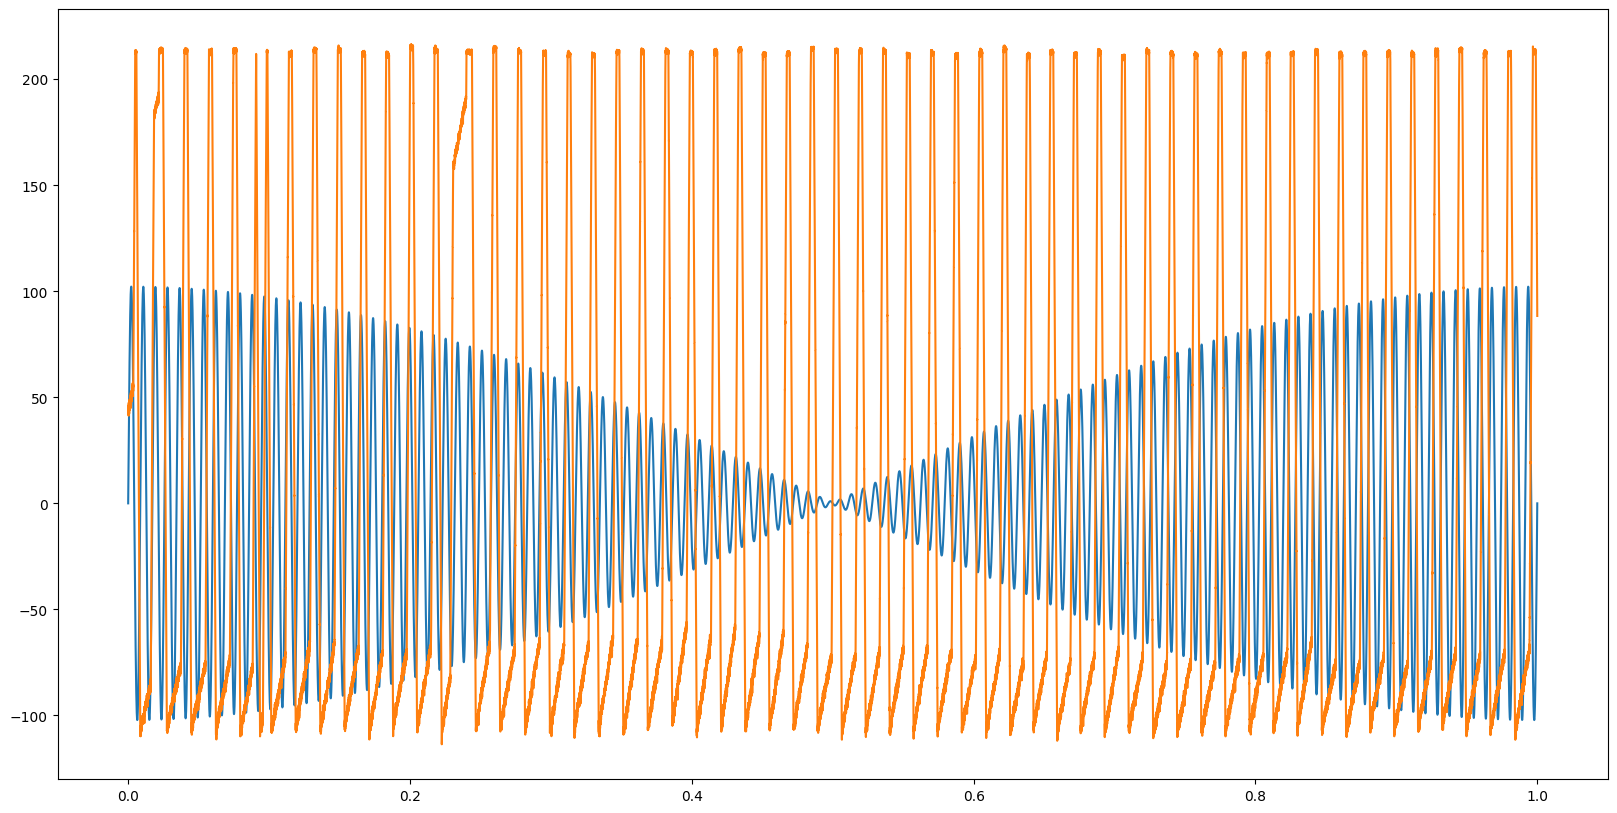

In [105]:
ax, fig = plt.subplots(figsize=(20, 10))
# plt.plot(t, y2, label='y1')
# plt.plot(t, y3, label='y2')
plt.plot(t, y, label='y1+y2')
plt.plot(t, df['LIT101'].iloc[0:len(t)]-600, label='y3')

In [106]:
y = data['LIT101']
sp   = np.fft.fft(y)               # the discrete fourier transform
freq = np.fft.fftfreq(y.shape[-1]) # the accompanying frequencies

In [107]:
def fourierExtrapolation(x, n_predict):
    n = len(x)
    n_harm = 10                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = np.fft.fft(x_notrend)  # detrended x in frequency domain
    f = np.fft.fftfreq(n)              # frequencies
    indexes = range(n)
    # sort indexes by frequency, lower -> higher
    indexes = sorted(indexes, key=lambda i: np.absolute(f[i]))
    # indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

In [108]:
res = fourierExtrapolation(train['LIT101'], 1000)

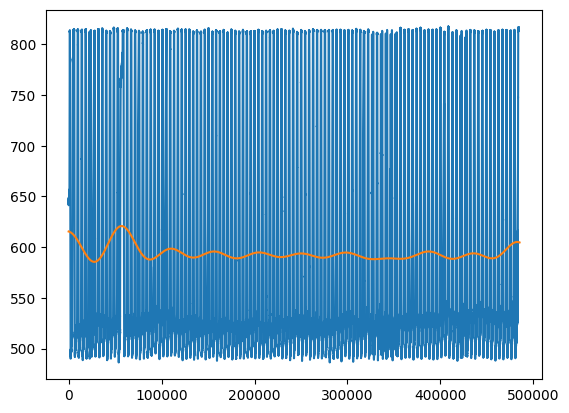

In [109]:
plt.plot(train['LIT101'])
plt.plot(pd.DataFrame(res))

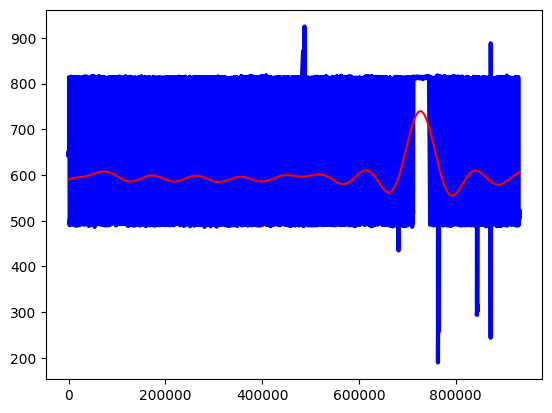

In [110]:
X = [i for i in range(365*5)]
slope = 5./365
b = 0.0
trend_Y = [i * slope + b for i in X]
seasonal_Y = [10*np.cos(2*np.pi * i /365. ) for i in X]
monthly_Y  = [5*np.cos(2*np.pi * i /30. ) for i in X]

combined_Y = [a+b+c for (a,b,c) in zip(trend_Y, seasonal_Y, monthly_Y)]
x = np.array(df['LIT101'])

n_predict = 180 #355 almost perfect, 180 awful
extrapolation = fourierExtrapolation(x[:-n_predict], n_predict)

plt.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
plt.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')

In [111]:
train, test = get_train_test_dataset(df)

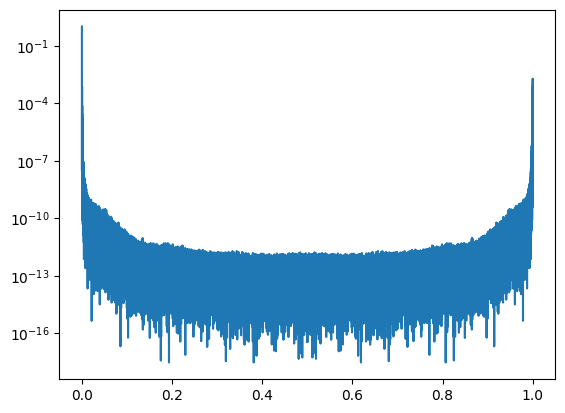

In [112]:
import numpy as np

data = train
x = list(range(len(data.index)))
y = data['LIT101']


# apply fast fourier transform and take absolute values
f=abs(np.fft.fft(y))

# get the list of frequencies
num=np.size(x)
freq = [i / num for i in list(range(num))]

# get the list of spectrums
spectrum = f.real * f.real + f.imag * f.imag
nspectrum = spectrum / spectrum[0]

# plot nspectrum per frequency, with a semilog scale on nspectrum
plt.semilogy(freq, nspectrum)

In [ ]:
np.var(f.imag)

In [ ]:
n_max = len(train)/60

results = pd.DataFrame({'freq': freq, 'nspectrum': nspectrum})
results['period'] = results['freq'] / (1/n_max)


results['period_round'] = results['period'].round()
grouped_hour = results.groupby('period_round')['nspectrum'].sum()
plt.semilogy(grouped_hour.index, grouped_hour)
# plt.xticks([i for i in range(0, int(n_max))])

In [ ]:
train, test = get_train_test_dataset(df)

In [ ]:
import matplotlib.pyplot as plt

from numpy.fft import rfft, irfft, rfftfreq
from scipy import fftpack
import pandas as pd


def low_pass(s, threshold=1e4):
    fourier = rfft(s)
    frequencies = rfftfreq(s.size, d=2e-2 / s.size)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

lf_signal_1 = low_pass(train['FIT101'])
plt.plot(train['FIT101'], color='lightgray')
plt.plot(lf_signal_1, color='black')

In [ ]:
import numpy as np

def decompose_into_n_signals(srs, n):
    fourier = rfft(srs)
    frequencies = rfftfreq(srs.size, d=2e-2/srs.size)
    out = []
    for vals in np.array_split(frequencies, n):
        ft_threshed = fourier.copy()
        ft_threshed[(vals.min() > frequencies)] = 0
        ft_threshed[(vals.max() < frequencies)] = 0        
        out.append(irfft(ft_threshed))
    return out

def plot_n_signals(sigs):
    fig, axarr = plt.subplots(len(sigs), figsize=(12, 12))
    for i, sig in enumerate(sigs):
        plt.sca(axarr[i])
        plt.plot(sig)
    plt.gcf().suptitle(f"Decomposition of signal into {len(sigs)} frequency bands", fontsize=24)

In [ ]:
import numpy as np

def decompose_into_n_signals(srs, n):
    fourier = rfft(srs)
    frequencies = rfftfreq(srs.size, d=2e-2/srs.size)
    out = []
    for vals in np.array_split(frequencies, n):
        ft_threshed = fourier.copy()
        ft_threshed[(vals.min() > frequencies)] = 0
        ft_threshed[(vals.max() < frequencies)] = 0        
        out.append(irfft(ft_threshed))
    return out

def plot_n_signals(sigs):
    fig, axarr = plt.subplots(1, 2, figsize=(12, 12))
    # for i, sig in enumerate(sigs):
    plt.sca(axarr[0])
    plt.plot(sigs[4])
        # if i == 0:
        #     break
    plt.gcf().suptitle(f"Decomposition of signal into {len(sigs)} frequency bands", fontsize=24)

In [ ]:

plot_n_signals(decompose_into_n_signals(test['AIT202'].iloc[0:60000], 5))

In [ ]:
ax, fig = plt.subplots( figsize=(15, 5))
sns.scatterplot(data=test.iloc[0:60000], x='Timestamp', y='AIT202', linewidth=0, alpha=0.5, s=2, hue='Normal/Attack')

In [ ]:

plot_n_signals(decompose_into_n_signals(test['AIT202'].iloc[0:60000], 5))

# FFT

In [113]:
def fft_denoiser(x, n_components, to_real=True):
    """Fast fourier transform denoiser.
    
    Denoises data using the fast fourier transform.
    
    Parameters
    ----------
    x : numpy.array
        The data to denoise.
    n_components : int
        The value above which the coefficients will be kept.
    to_real : bool, optional, default: True
        Whether to remove the complex part (True) or not (False)
        
    Returns
    -------
    clean_data : numpy.array
        The denoised data.
        
    References
    ----------
    .. [1] Steve Brunton - Denoising Data with FFT[Python]
       https://www.youtube.com/watch?v=s2K1JfNR7Sc&ab_channel=SteveBrunton
    
    """
    n = len(x)
    
    # compute the fft
    fft = np.fft.fft(x, n)
    
    # compute power spectrum density
    # squared magnitud of each fft coefficient
    PSD = fft * np.conj(fft) / n
    
    # keep high frequencies
    _mask = PSD > n_components
    fft = _mask * fft
    
    # inverse fourier transform
    clean_data = np.fft.ifft(fft)
    
    if to_real:
        clean_data = clean_data.real
    
    return clean_data

In [114]:
x = fft_denoiser(train.iloc[0:60000]['FIT101'], 0.01)

In [190]:
def diff_num(a, n):
    for i in range(n, len(a)):
        if i == 0:
            yield 0
        else:
            yield a[i] - a[i-n]
n = 1

# for col in cols_continuous:
#     df[f'{col}_discrete'] = [0] * n + [x for x in diff_num(df[col], n)] #1 if x > 0 else -1

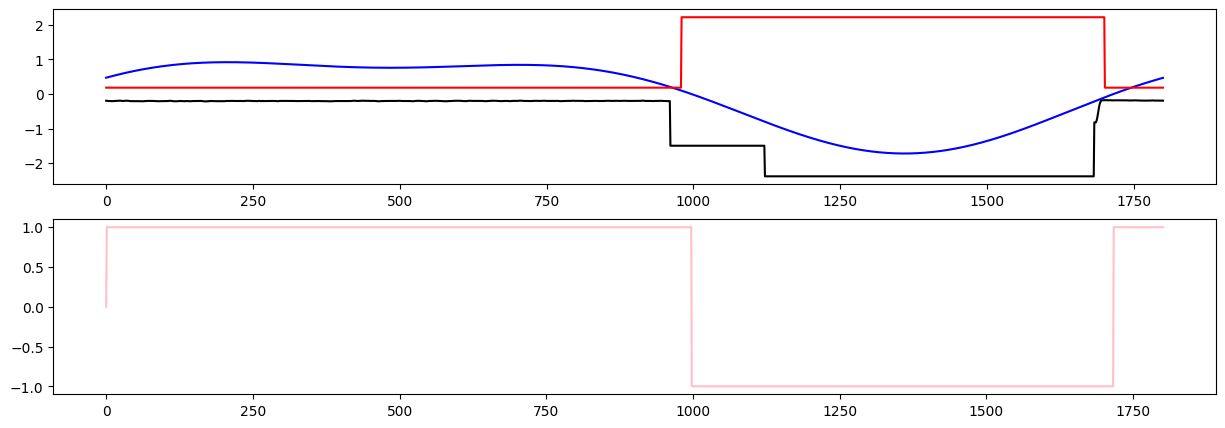

In [214]:
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

timestamp_data = test['Timestamp'].between('2015-12-28 14:00:00', '2015-12-28 14:30:00')
data = test[timestamp_data]
normalization = StandardScaler()
df_normalized = normalization.fit_transform(data[cols_numeric])
df_normalized = pd.DataFrame(df_normalized, columns=cols_numeric) # columns=cols_numeric

x = fft_denoiser(df_normalized['FIT401'], 30)
# x_slope = [0] * n + [1 if x > 0 else -1 for x in x]
x_slope_15 = [0] * n + [1 if x > 0 else -1 for x in x]
ax[0].plot(x, color='blue')
# ax[1].plot(x_slope, color='blue')
ax[1].plot(x_slope_15, color='pink')
ax[0].plot(df_normalized['FIT401']-1, color='black')
ax[0].plot(df_normalized['Normal/Attack'] +1, color='red')
plt.show()

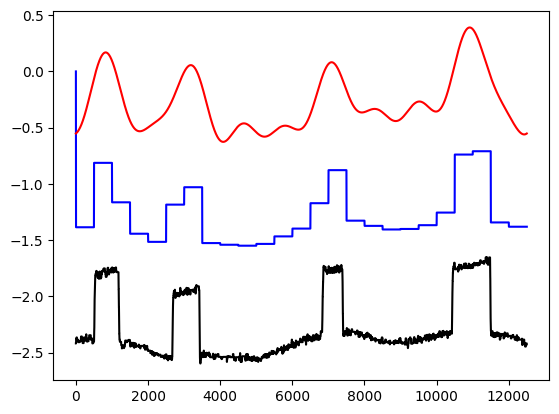

In [273]:
n = 500
denoiser = 0
for i in range(7500, 20000, n):
    x = fft_denoiser(df_normalized.iloc[i:i+n]['AIT202'], 20)
    denoiser = np.append(denoiser, x)
    
    
plt.plot(denoiser, color='blue')
plt.plot(fft_denoiser(df_normalized.iloc[7500:20000]['AIT202'], 20)+1, color = 'red')
plt.plot(df_normalized.iloc[7500:20000].reset_index(drop=True)['AIT202']-1, color='black')

In [473]:
data = df
normalization = StandardScaler()
df_normalized = normalization.fit_transform(data[cols_numeric])
df_normalized = pd.DataFrame(df_normalized, columns=cols_numeric)

In [501]:
df_normalized['Timestamp'] = df['Timestamp']

In [502]:
train_normalized, test_normalized = get_train_test_dataset(df_normalized)

data_normalized = test_normalized.iloc[0:60000]

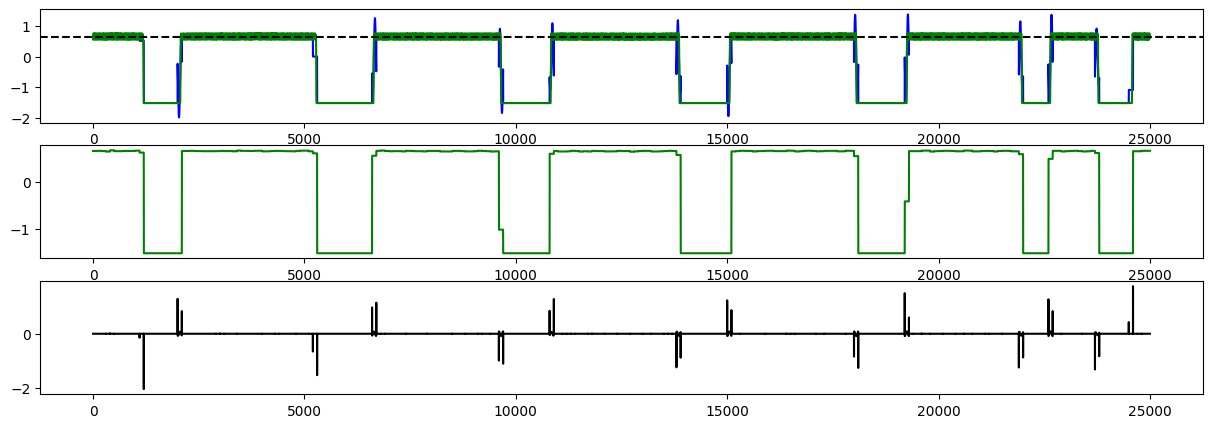

In [494]:
fig, ax = plt.subplots(3, 1, figsize=(15, 5))

index_min = 0
index_max = 25000
    
median_de = np.median(denoiser) 
# ax[0].plot(pd.DataFrame(fft_denoise).iloc[index_min:index_max], color = 'red')
# ax[0].plot(pd.DataFrame(data).iloc[index_min:index_max]-1, color='black')


median_['slope'] = median_[['denoiser', 'y']].apply(lambda x: 1 if x[0] > x[1] else -1, axis=1)

# x_slope_denoiser = [0] * 1 + [1 if x > median_de else -1 for x in np.array(median_['denoiser'])]
x_slope_denoiser = [0] * 1 + [ x for x in diff_num(np.array(median_['denoiser']), 1)]#1 if x > 0 else -1 for

# x_slope_fft_denoise = [0] * 1 + [1 if x > 0 else -1 for x in diff_num(fft_denoise, 1)]
# x_slope_data = [0] * 1 + [1 if x > 0 else -1 for x in diff_num(data, 1)]



ax[0].plot(pd.DataFrame(denoiser).iloc[index_min:index_max].reset_index(drop=True), color='blue')
ax[0].plot(df_normalized.iloc[index_min:index_max][feature].reset_index(drop=True), color='green')
ax[0].axhline(y=median_de , color='black', linestyle='--')

ax[1].plot(np.array(median_['y'].iloc[index_min:index_max].reset_index(drop=True)), color='green')
# ax[1].plot(np.array(median_['slope'].iloc[index_min:index_max].reset_index(drop=True)), color='green')


ax[2].plot(x_slope_denoiser[index_min:index_max], color='black')

# ax[2].plot(np.array(median_['slope'].iloc[index_min:index_max].reset_index(drop=True) )-2.2, color='blue')
# ax[1].plot(x_slope_fft_denoise[index_min:index_max], color='red')
# ax[1].plot(pd.DataFrame(x_slope_data).iloc[index_min:index_max]-2.2, color='black')
plt.show()

In [659]:
attack_df = pd.read_csv('attacks_df.csv')
attack_df['start_time'] = pd.to_datetime(attack_df['start_time'])
attack_df['end_time'] = pd.to_datetime(attack_df['end_time'])

def get_timestamp_attack(index_attack, offset):
    index_start = df[df['Timestamp'] == attack_df.iloc[index_attack]['start_time']].index[0] - offset
    index_end = df[df['Timestamp'] == attack_df.iloc[index_attack]['end_time']].index[0] + offset
    return index_start, index_end

In [660]:

def get_index_attack(attack_name):
    list_attack_index = []
    for i, attack in zip(attack_df['num_attack'], attack_df['attack']):
        attack = attack.replace('-', '')
        if attack_name in attack:
            list_attack_index.append(i)
    return list_attack_index

In [662]:
get_index_attack('LIT301')

[26, 30, 32]

In [ ]:
feature = 'LIT301'

In [549]:

n = 100
median_ = pd.DataFrame(columns=['x', 'y'])
for i in range(0, len(df_normalized), n):
    med = np.median(df_normalized.iloc[i:i+n][feature])
    a = n
    if i+n > len(df_normalized):
        a = len(df_normalized) - i
    median_ = pd.concat(objs=[median_, pd.DataFrame({'x': [i for i in range(i, i+a)], 'y': [med for i in range(i, i+a)]})], axis=0)


In [558]:

n = 100
denoiser = []
for i in range(0, len(df_normalized), n):
    x = fft_denoiser(df_normalized.iloc[i:i+n][feature], 20)
    denoiser = np.append(denoiser, x)

In [598]:

x_slope_denoiser = [0] * 1 + [ x for x in diff_num(np.array(median_['y']), 1)]#1 if x > 0 else -1 for

slope_denoiser = pd.DataFrame(x_slope_denoiser, columns=['slope_denoiser'])
slope = slope_denoiser['slope_denoiser'].apply(lambda x: (np.abs(x)) if x != 0 else 0)

In [602]:
all_median = [slope[x] for x in range(0, len(slope), 100) if slope[x] > 0]
median_de = np.quantile(all_median, 0.95)

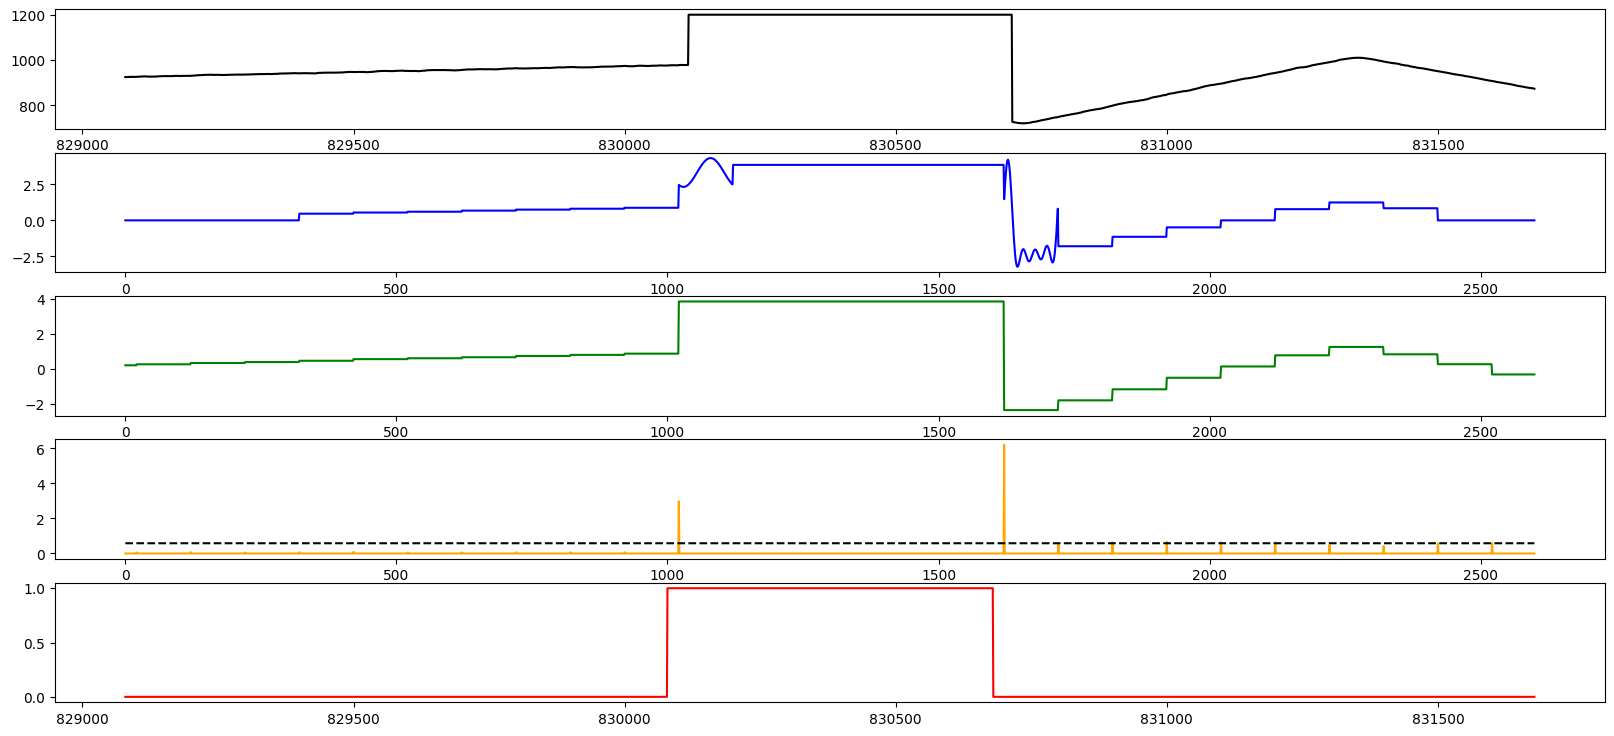

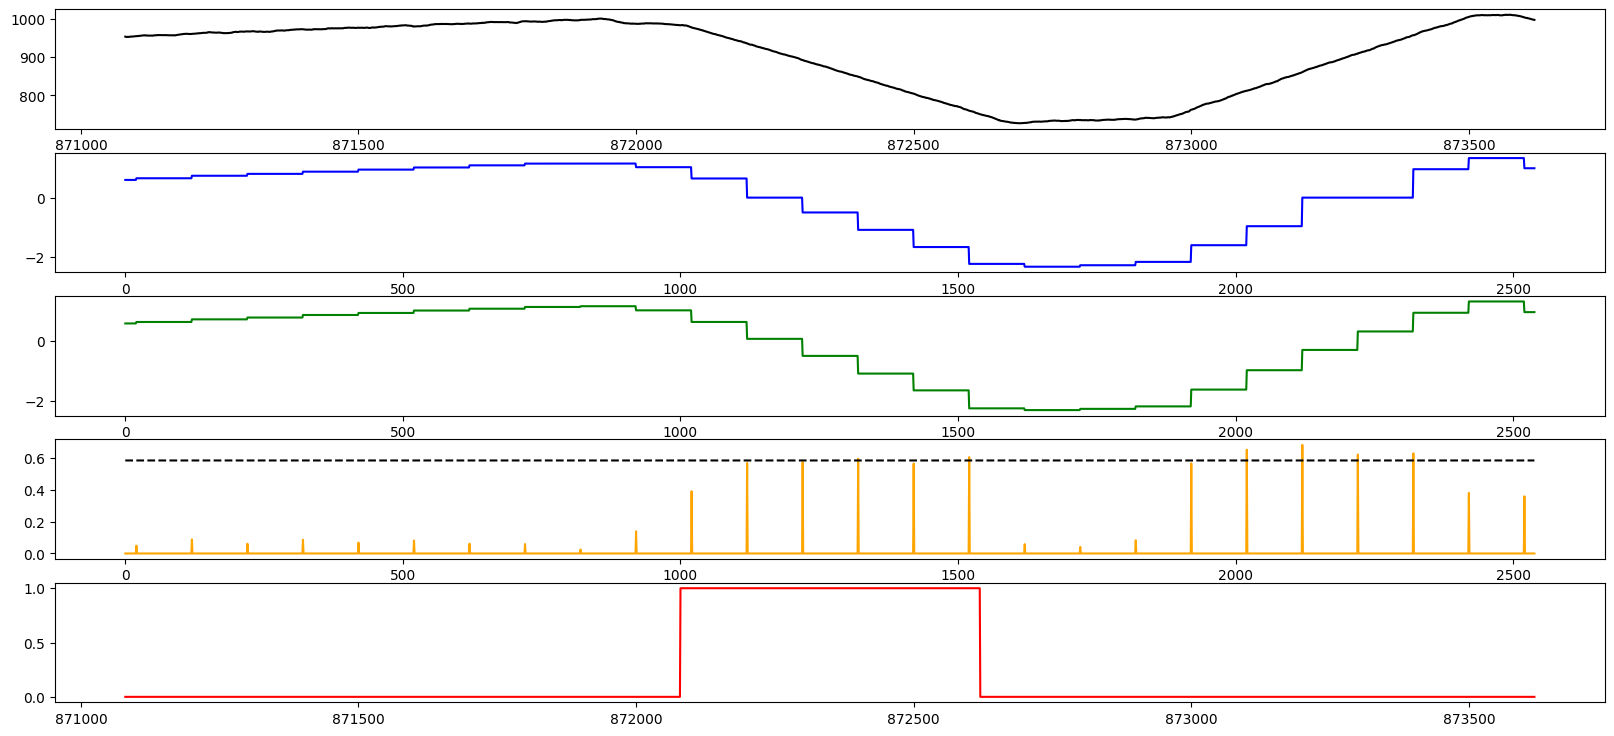

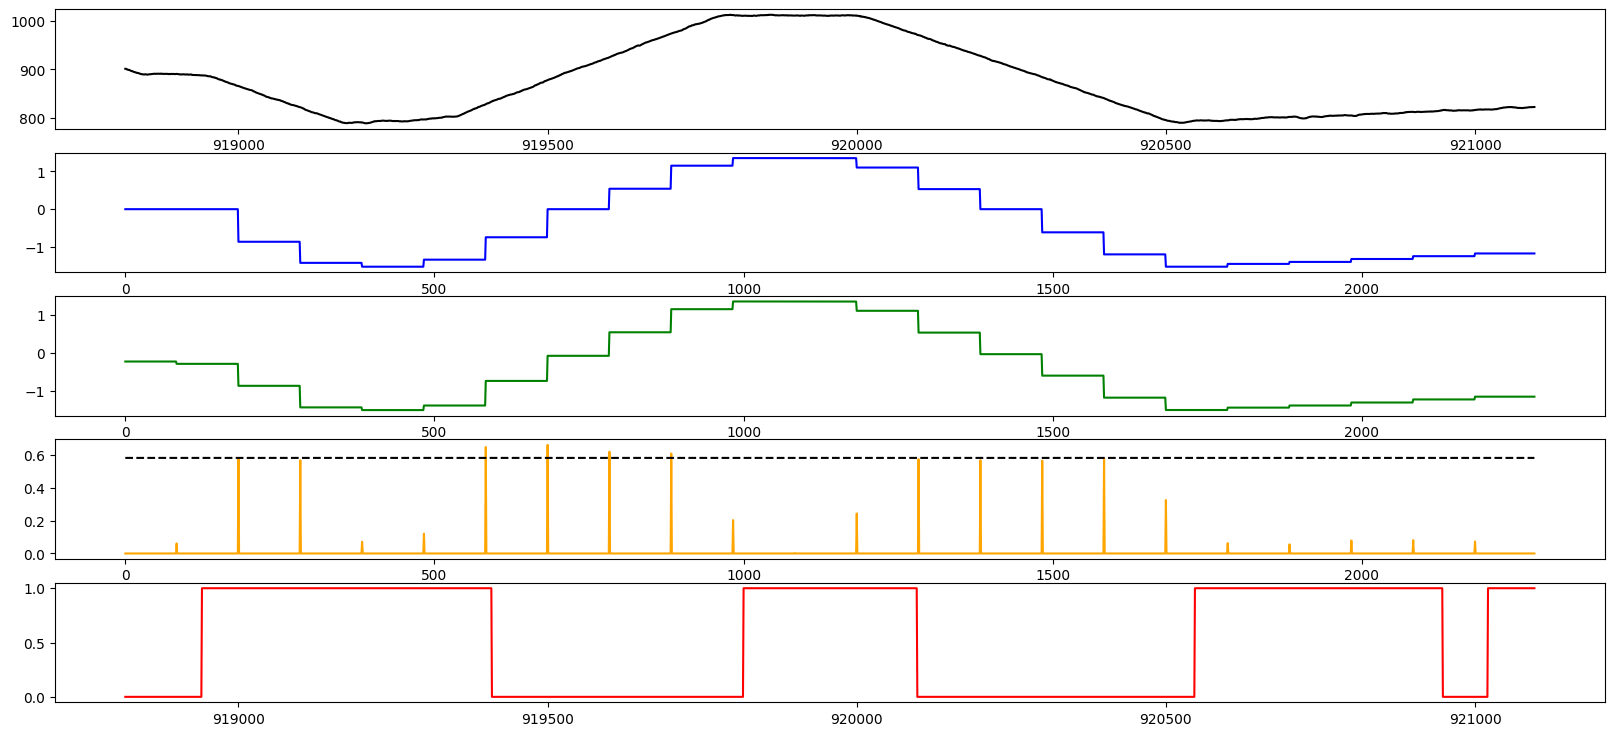

In [661]:
for attack in get_index_attack('LIT301'):
    
    fig, ax = plt.subplots(5, 1, figsize=(20, 9))

    index_min, index_max = get_timestamp_attack(index_attack=attack, offset=1000)

    ax[0].plot(df[feature][index_min:index_max], color='black')
    ax[1].plot(np.array(denoiser)[index_min:index_max], color='blue')
    ax[2].plot(np.array(median_['y'])[index_min:index_max], color='green')
    ax[3].plot(slope[index_min:index_max].reset_index(drop=True), color='orange')
    ax[3].plot([median_de for i in range(index_max-index_min)], color='black', linestyle='--')
    ax[4].plot(df['Normal/Attack'][index_min:index_max], color='red')
    plt.show()

In [613]:
slope_df = pd.DataFrame(slope)
slope_df['Normal/Attack'] = df['Normal/Attack']

In [636]:
data_melt = slope_df[slope_df['slope_denoiser'] != 0].melt(id_vars=['Normal/Attack'], value_vars=['slope_denoiser'])

(0.2, 1.0)

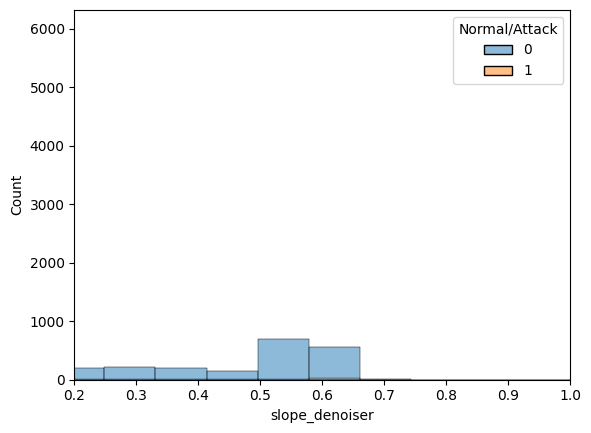

In [641]:
sns.histplot(data=slope_df[slope_df['slope_denoiser'] != 0], bins=100, x='slope_denoiser', hue='Normal/Attack')
plt.xlim(0.2, 1)

(0.0, 1.0)

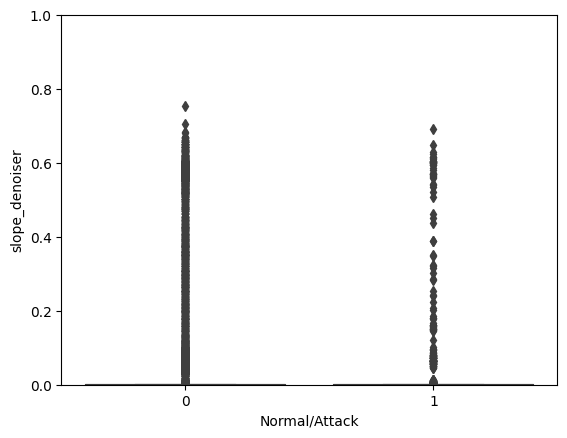

In [626]:
sns.boxplot(x=slope_df['Normal/Attack'], y=slope_df['slope_denoiser'])
# plt.xlim(0, 1)
plt.ylim(0, 1)

In [547]:

# data_normalized = test_normalized[test_normalized['Timestamp'].between('2015-12-31 01:34:00', '2015-12-31 11:34:00')]
data_normalized = test_normalized[test_normalized['Timestamp'].between('2015-12-29 11:50:00', '2015-12-29 12:10:00')]
data_normalized_train = train_normalized

feature = 'LIT301'

n = 100
denoiser = []
for i in range(0, len(data_normalized), n):
    x = fft_denoiser(data_normalized.iloc[i:i+n][feature], 20)
    denoiser = np.append(denoiser, x)

# fft_denoise = fft_denoiser(data_normalized[feature], 20)
# data = data_normalized[feature]


n = 100
median_ = pd.DataFrame(columns=['x', 'y'])
for i in range(0, len(data_normalized), n):
    med = np.median(data_normalized.iloc[i:i+n%len(data_normalized)][feature])
    a = n
    if i+n > len(data_normalized):
        a = len(data_normalized) - i
    median_ = pd.concat(objs=[median_, pd.DataFrame({'x': [i for i in range(i, i+a)], 'y': [med for i in range(i, i+a)]})], axis=0)

median_['denoiser'] = np.array(denoiser)


x_slope_denoiser = [0] * 1 + [ x for x in diff_num(np.array(median_['denoiser']), 1)]#1 if x > 0 else -1 for

slope_denoiser = pd.DataFrame(x_slope_denoiser, columns=['slope_denoiser'])
log_10_slope = slope_denoiser['slope_denoiser'].apply(lambda x: (np.abs(x)) if x != 0 else 0)

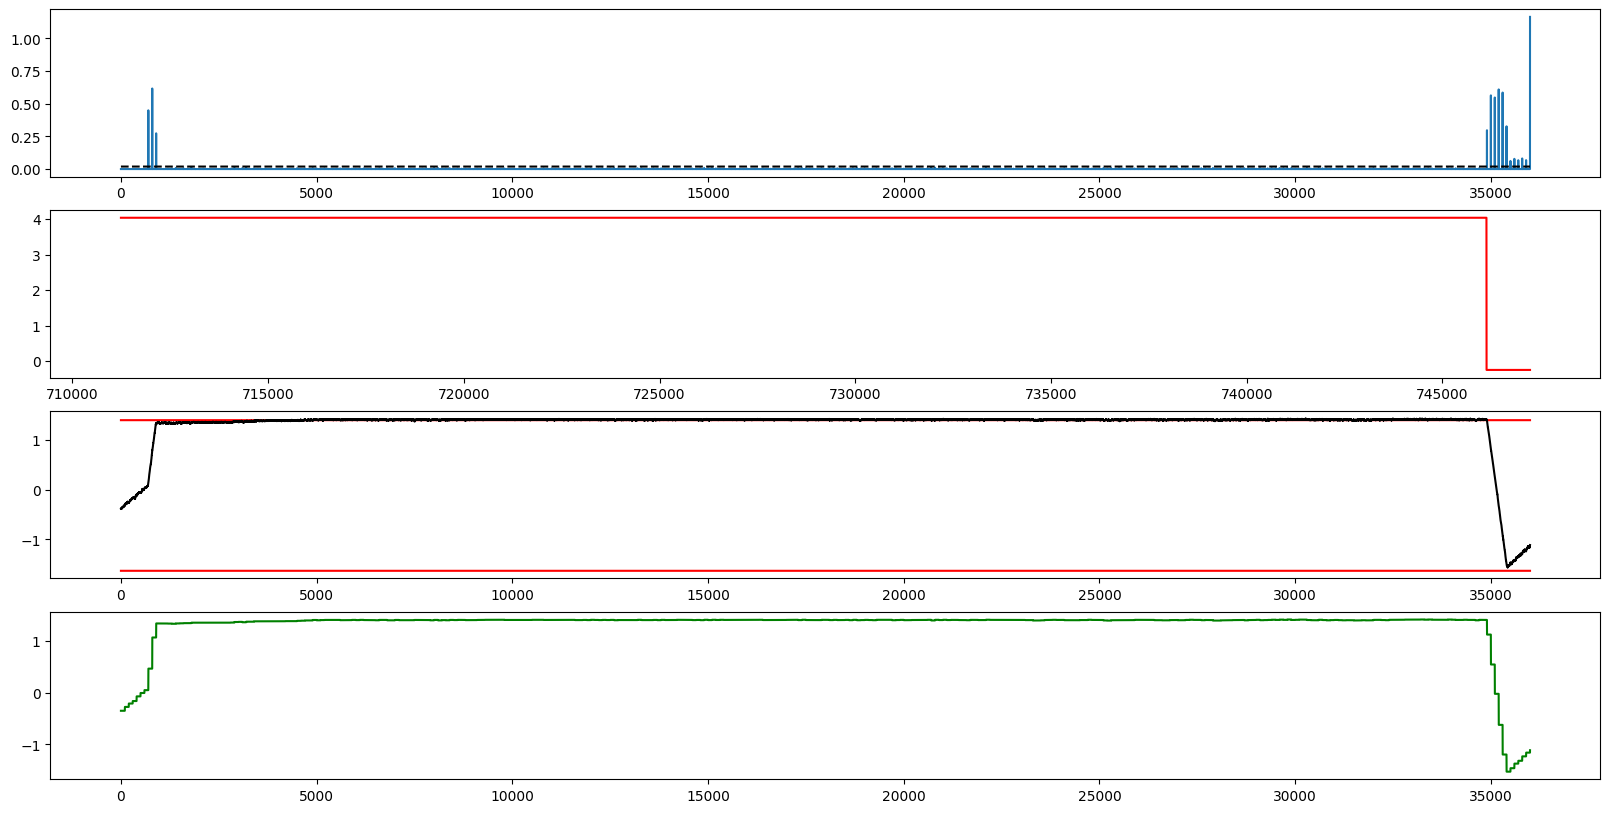

In [548]:
all_median = [log_10_slope[x] for x in range(0, len(log_10_slope), 100) if log_10_slope[x] > 0]
median_de = np.mean(all_median) 

fig, ax = plt.subplots(4, 1, figsize=(20, 10))
ax[0].plot(log_10_slope)
ax[0].plot([median_de for i in range(len(log_10_slope))], color='black', linestyle='--')

ax[1].plot(data_normalized['Normal/Attack'], color='red')

ax[2].plot([np.max(data_normalized_train[feature]) for i in range(len(data_normalized[feature]))], color='red')
ax[2].plot(data_normalized[feature].reset_index(drop=True), color='black')
ax[2].plot([np.min(data_normalized_train[feature]) for i in range(len(data_normalized[feature]))], color='red')

ax[3].plot(np.array(median_['y']), color='green')

FIT101


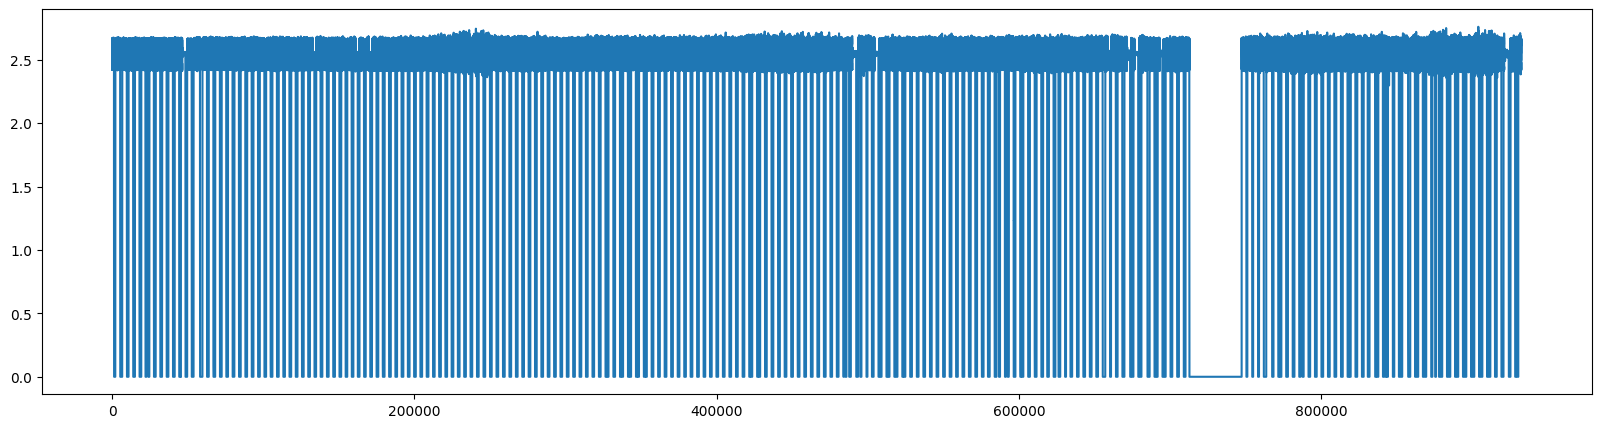

FIT201


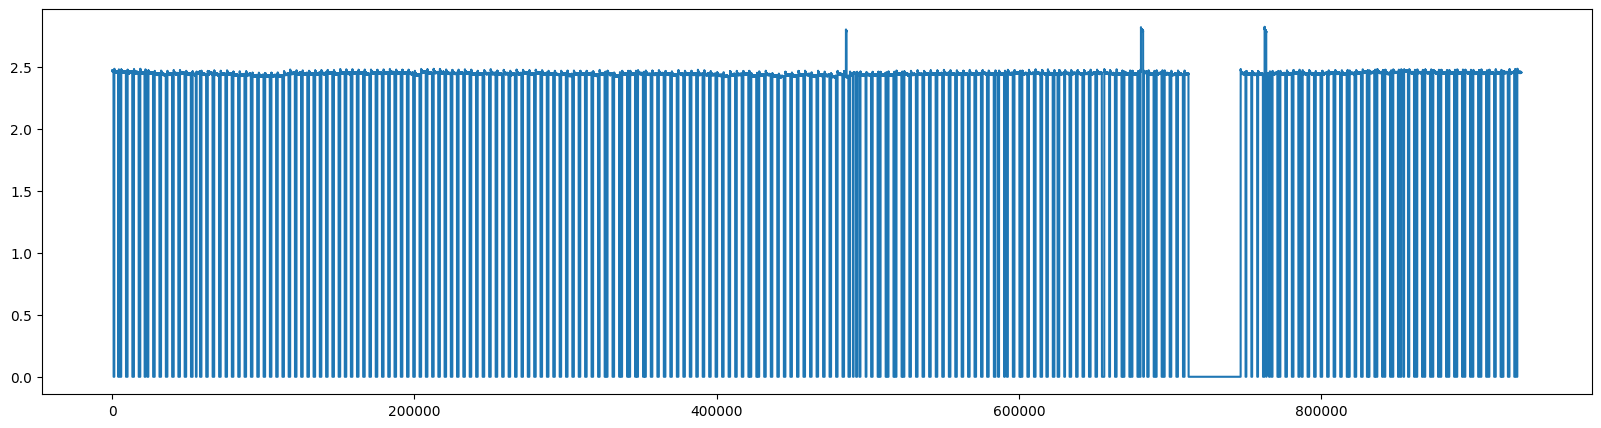

FIT301


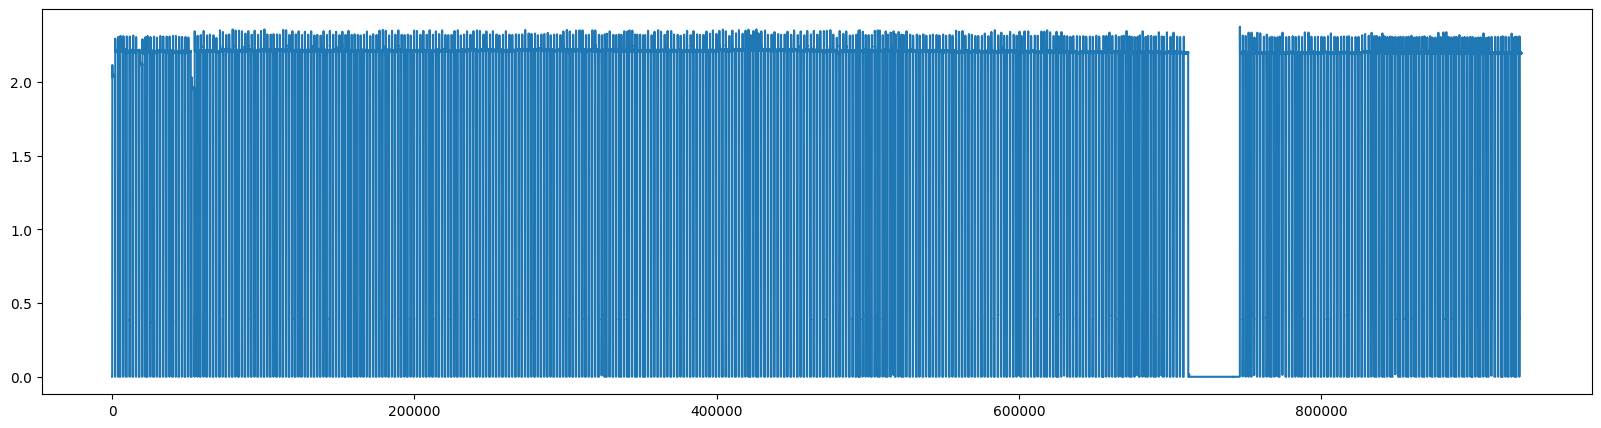

FIT401


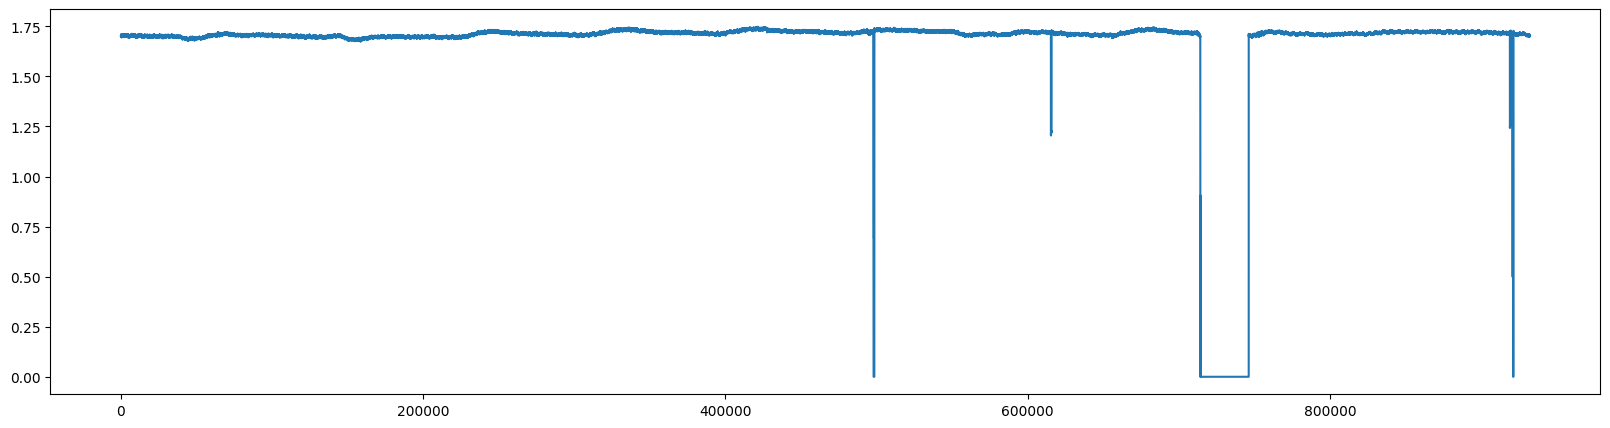

FIT501


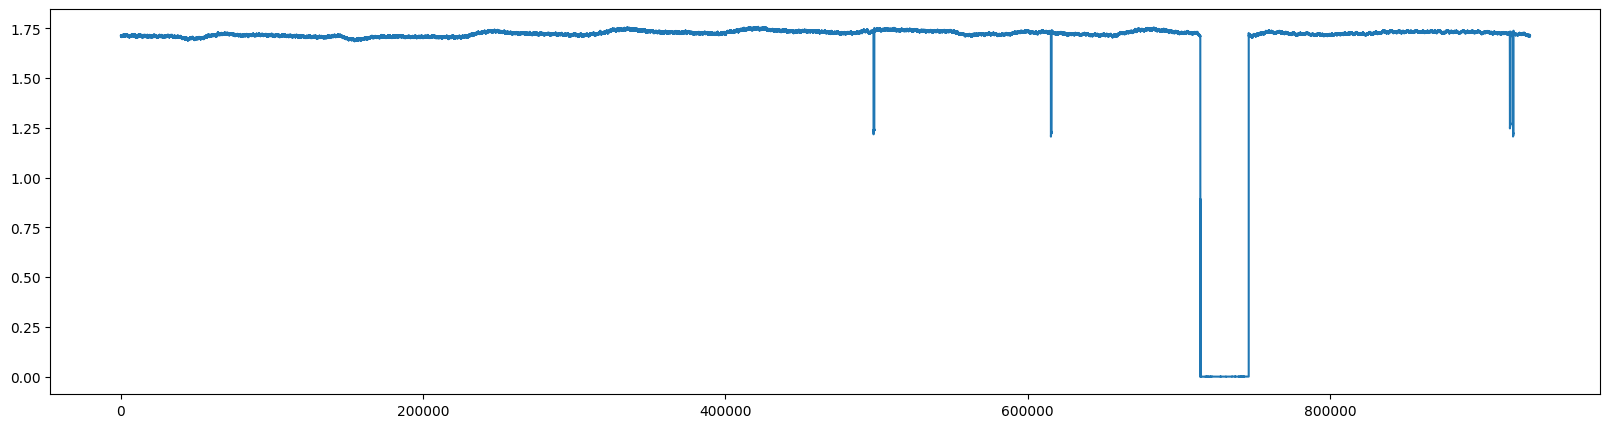

FIT502


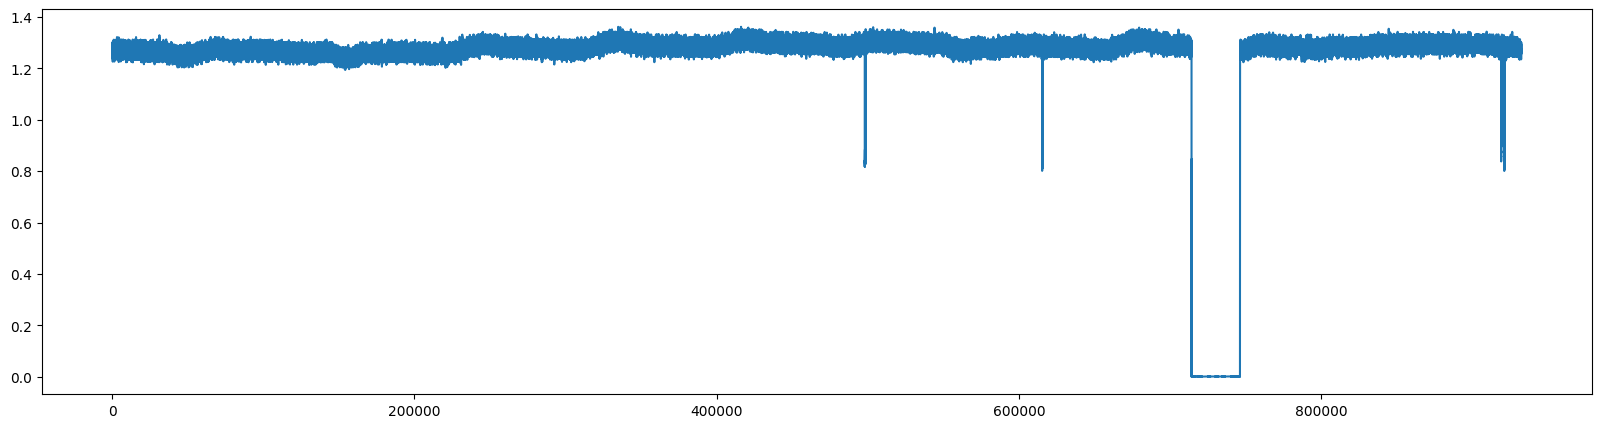

FIT503


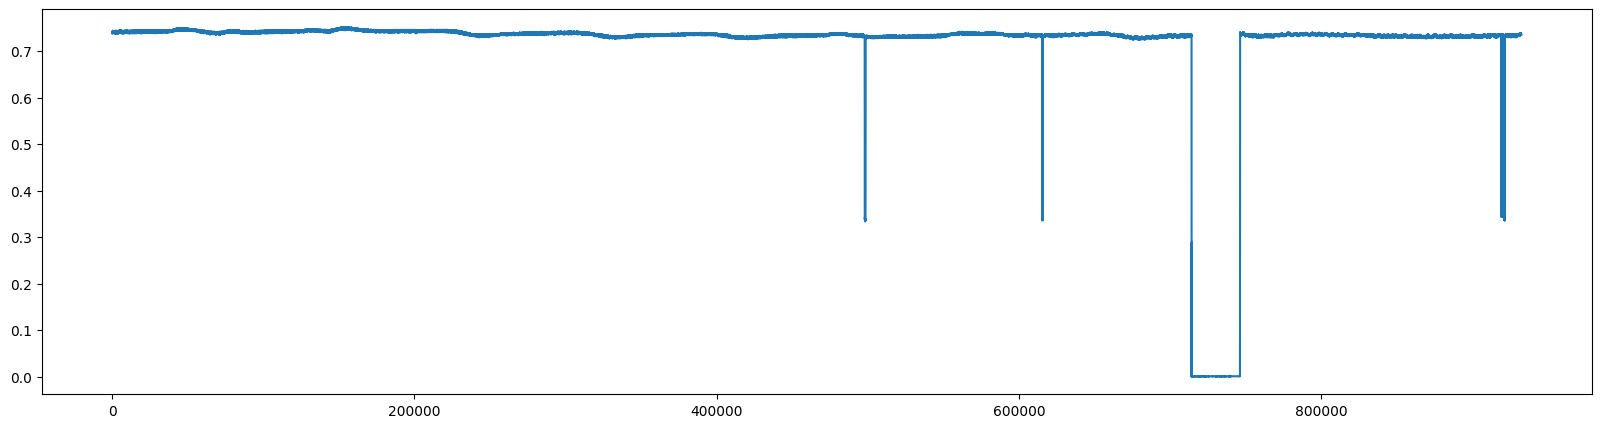

FIT504


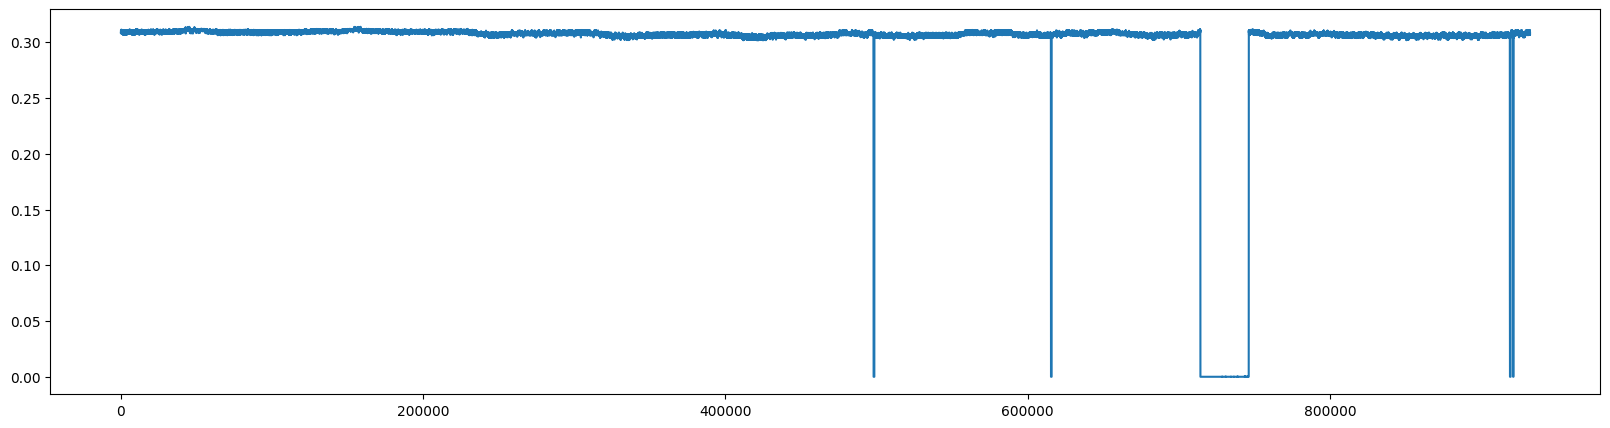

FIT601


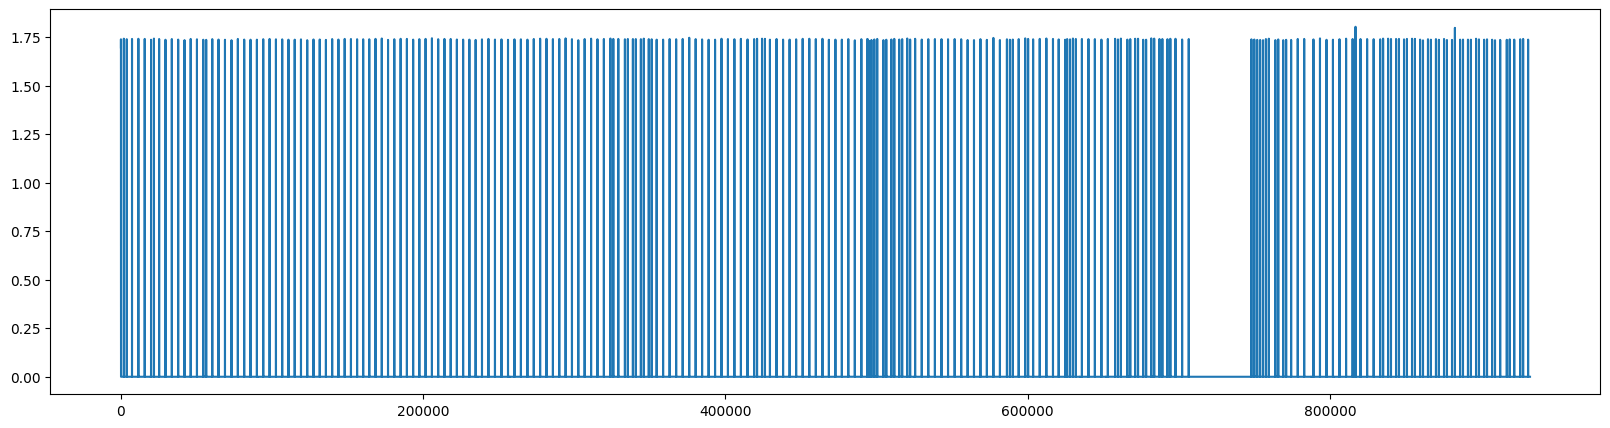

In [516]:
for col in df.columns:
    if 'FIT' in col:
        print(col)
        fig, ax = plt.subplots(figsize=(20, 5))
        plt.plot(df[col])
        plt.show()

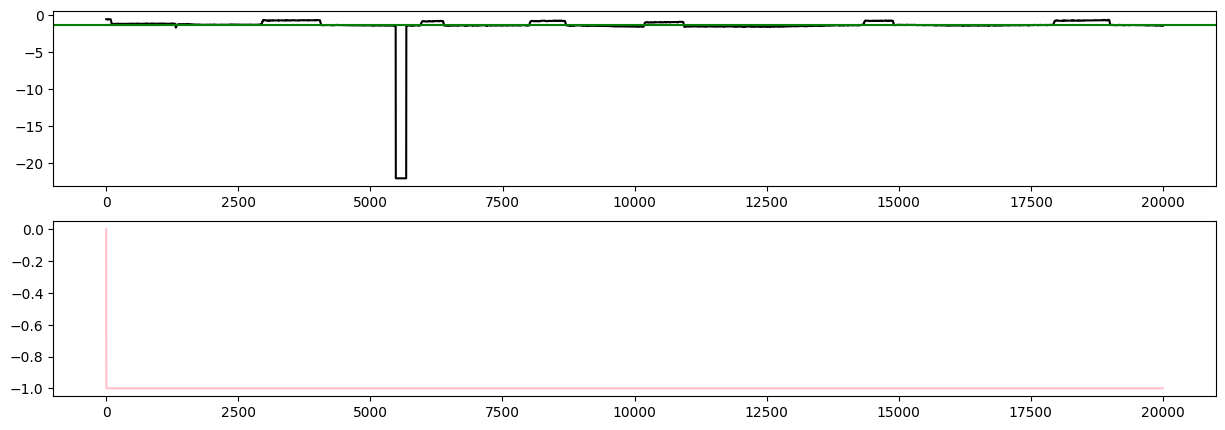

In [257]:
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

# timestamp_data = test#['Timestamp'].between('2015-12-28 12:00:00', '2015-12-28 12:10:00')
# data = test.iloc[0:20000]
normalization = StandardScaler()
df_normalized = normalization.fit_transform(test[cols_numeric])
df_normalized = pd.DataFrame(df_normalized, columns=cols_numeric) 

# x = fft_denoiser(df_normalized.iloc[0:20000]['AIT202'], 20)

denoiser = 0
for i in range(0, 20000, 1000):
    x = fft_denoiser(df_normalized.iloc[i:i+1000]['AIT202'], 20)
    denoiser = np.append(denoiser, x)

x_slope = [0] * n + [1 if x > 0 else -1 for x in denoiser]


ax[0].plot(x, color='blue')
ax[1].plot(x_slope, color='pink')
ax[0].plot(df_normalized.iloc[0:20000]['AIT202'], color='black')
# ax[0].plot(df_normalized.iloc[0:20000]['Normal/Attack'] +1, color='red')
ax[0].axhline(np.median(df_normalized.iloc[0:20000]['AIT202']), color='green')
plt.show()

## Diff slope

In [ ]:
diff([0, 3, 3, 2, 1, 2, 3, 4, 5], n=1)

In [ ]:

sns.histplot(df, x='AIT201_discrete', bins= 30)
plt.yscale('log')

In [ ]:
sns.histplot(train, x='AIT201_discrete', bins= 30)
plt.yscale('log')

In [ ]:
sns.histplot(test, x='AIT201_discrete', bins= 30, hue='Normal/Attack_discrete', multiple='stack')
plt.yscale('log')

In [ ]:
# ax, fig = plt.subplots(figsize=(20, 20), dpi=200)
sns.jointplot(data=test, y='LIT101_discrete_test', x='Timestamp', hue='Normal/Attack', linewidth=0, alpha=0.5, s=3, height=10)
# plt.yscale('log')
# plt.ylim(-1.5, 1.5)

In [ ]:
# ax, fig = plt.subplots(figsize=(20, 20), dpi=200)
sns.histplot(data=test, x='LIT101_discrete_test', hue='Normal/Attack', bins=100, multiple='stack')
plt.yscale('log')

In [ ]:
print(test[np.abs(test['LIT101_discrete_test']) > 100]['Normal/Attack'].value_counts())
print(test['Normal/Attack'].value_counts())

In [ ]:
quantiles_lit101 = train['LIT101_discrete'].quantile([0.001, 0.25, 0.5, 0.75, 0.999])

In [ ]:
quantiles_lit101

In [ ]:
test['LIT101_discrete_anomaly'] = test['LIT101_discrete'].apply(lambda x: 1 if x < quantiles_lit101[0.1] or x > quantiles_lit101[0.9] else 0)

In [ ]:
for col in cols_discrete:
    df[f'{col}_discrete'] = df[col]

In [ ]:
train, test = get_train_test_dataset(df)

In [ ]:
discrete_cols = cols_discrete
for col in df.columns:
    if 'discrete' in col:
        discrete_cols.append(col)

In [ ]:
print('train states: ', len(train[discrete_cols].value_counts()))
print('test states: ', len(test[discrete_cols].value_counts()))
print('total states: ', len(df[discrete_cols].value_counts()))
print('state in common', (len(train[discrete_cols].value_counts())+len(test[discrete_cols].value_counts()))-len(df[discrete_cols].value_counts()))
print('percentage of common:', ((len(train[discrete_cols].value_counts())+len(test[discrete_cols].value_counts()))-len(df[discrete_cols].value_counts())) / len(df[discrete_cols].value_counts()))

In [ ]:
len(df[discrete_cols].value_counts())

In [ ]:
fig,ax = plt.subplots(figsize=(14,8), dpi=300)

time_range = 30
feature = 'FIT101'

sns.lineplot(x=df[feature].iloc[0: time_range].index, y=df[feature].iloc[0: time_range], ax=ax, color='black', alpha=0.5, linewidth=0.5)
sns.scatterplot(x=df.iloc[0: time_range].index, y=df[feature].iloc[0: time_range], hue=df[f'{feature}_slope'].iloc[0: time_range], s=15, alpha=0.9, linewidth=0, palette='Set1', ax=ax)


Old methodology (3hours process)

In [ ]:
TIME_WINDOW = 5

x = [i for i in range(TIME_WINDOW)]

for col in cols_continuous:
    df[f'{col}_slope'] = 0
    print(col)
    for i in range(TIME_WINDOW, len(df[col])):
        df[f'{col}_slope'].iloc[TIME_WINDOW + i] = 1 if np.polyfit(x, pd.Series(df[col].iloc[i + 1: TIME_WINDOW + i +1]) , 1)[0] > 0 else -1


# Get State by quantiles

In [ ]:

def get_state(row, quantiles):
    if row <= quantiles[0.25]:
        return 1
    elif row > quantiles[0.25] and row <= quantiles[0.5]:
        return 2
    elif row > quantiles[0.5] and row <= quantiles[0.75]:
        return 3
    elif row > quantiles[0.75]:
        return 4
        
# create discrete variables for the continuous variables based on the quantiles of train set
for col in cols_continuous:
    quantiles = train[col].quantile([0.25, 0.5, 0.75])
    df[f'{col}_discrete'] = df[col].apply(lambda x: get_state(x, quantiles))
# ~9 mins

In [ ]:

# def get_state(row, mean):
#     if row <= mean:
#         return 1
#     elif row > mean:
#         return 2
        
        
# # create discrete variables for the continuous variables
# for col in cols_continuous:
#     mean = np.mean(train[col])
#     df[f'{col}_discrete'] = df[col].apply(lambda x: get_state(x, mean))


In [ ]:
for col in cols_discrete:
    df[f'{col}_discrete'] = df[col]

In [ ]:
for col in df.columns:
    if 'discrete' in col:
        print(col)
        print(df[col].value_counts())
        print('------------------------')

# Analysis State

In [ ]:
train, test = get_train_test_dataset(df)

In [ ]:
data = pd.DataFrame(columns=['col','quantile 0.05','quantile 0.25','quantile 0.5','quantile 0.75','quantile 0.95','quantile_var','polynom coef','min','max','mean','median','variance',])
for col in cols_continuous:
    p = np.polyfit([ i for i in range(len(df[col]))], df[col], 1)
    dict = {'col': col, 
            'quantile 0.05': np.quantile(df[col], 0.05),
            'quantile 0.25': np.quantile(df[col], 0.25),
            'quantile 0.5': np.quantile(df[col], 0.5),
            'quantile 0.75': np.quantile(df[col], 0.75),
            'quantile 0.95': np.quantile(df[col], 0.95),
            'quantile_var': np.var(np.quantile(df[col], [0.25, 0.5, 0.75])), 
            'polynom coef': p[0] * 100000,
            'min': np.min(df[col]), 
            'max': np.max(df[col]),
            'mean': np.mean(df[col]), 
            'median': np.median(df[col]),
            'variance': np.var(df[col]),}
    data = pd.concat([data, pd.DataFrame(dict, index=[0])], axis=0, ignore_index=True)

data_columns = list(data.columns)
data_columns.remove('col')
for col in data_columns:
    data[col] = data[col].apply(lambda x: np.round(x, 4))

In [ ]:
data['to_delete'] = data['quantile_var'] < 2
data.sort_values(by=['col'], ascending=False)

In [ ]:
data = pd.DataFrame(columns=['col','quantile 0.05','quantile 0.25','quantile 0.5','quantile 0.75','quantile 0.95','quantile_var','polynom coef','min','max','mean','median','variance',])
for col in cols_continuous:
    p = np.polyfit([ i for i in range(len(df[f'{col}_discrete']))], df[f'{col}_discrete'], 1)
    dict = {'col': col, 
            'quantile 0.05': np.quantile(df[f'{col}_discrete'], 0.05),
            'quantile 0.25': np.quantile(df[f'{col}_discrete'], 0.25),
            'quantile 0.5': np.quantile(df[f'{col}_discrete'], 0.5),
            'quantile 0.75': np.quantile(df[f'{col}_discrete'], 0.75),
            'quantile 0.95': np.quantile(df[f'{col}_discrete'], 0.95),
            'quantile_var': np.var(np.quantile(df[f'{col}_discrete'], [0.25, 0.5, 0.75])), 
            'polynom coef': p[0] * 100000,
            'min': np.min(df[f'{col}_discrete']), 
            'max': np.max(df[f'{col}_discrete']),
            'mean': np.mean(df[f'{col}_discrete']), 
            'median': np.median(df[f'{col}_discrete']),
            'variance': np.var(df[f'{col}_discrete']),}
    data = pd.concat([data, pd.DataFrame(dict, index=[0])], axis=0, ignore_index=True)

data_columns = list(data.columns)
data_columns.remove('col')
for col in data_columns:
    data[col] = data[col].apply(lambda x: np.round(x, 4))

In [ ]:
sns.histplot(df, x='FIT101', bins=100)

In [ ]:
data['to_delete'] = data['quantile_var'] < 2
data.sort_values(by=['col'], ascending=False)

In [ ]:
sns.histplot(data=df, x='resp_1', hue='action', kde=True)

Set The feature selection 

In [ ]:
discrete_cols = []
for col in df.columns:
    if 'FIT' not in col:
        discrete_cols.append(col)
# discrete_cols.remove('Normal/Attack_discrete')

In [ ]:
discrete_cols = []
for col in df.columns:
    if 'slope' in col:
        discrete_cols.append(col)
# discrete_cols.remove('Normal/Attack_discrete')

for i in range(len(data)):
    col = data.iloc[i]['col']+'_slope'
    to_delete = data.iloc[i]['to_delete']
    if to_delete:
        discrete_cols.remove(col)

In [ ]:
df_discrete = df[discrete_cols + ['Timestamp'] + ['Normal/Attack_discrete']]

In [ ]:
# df_discrete.to_csv('df_discrete.csv', index=False)

## Common State between Train and Test

In [ ]:
print('train states: ', len(train[discrete_cols].value_counts()))
print('test states: ', len(test[discrete_cols].value_counts()))
print('total states: ', len(df[discrete_cols].value_counts()))
print('state in common', (len(train[discrete_cols].value_counts())+len(test[discrete_cols].value_counts()))-len(df[discrete_cols].value_counts()))
print('percentage of common:', ((len(train[discrete_cols].value_counts())+len(test[discrete_cols].value_counts()))-len(df[discrete_cols].value_counts())) / len(df[discrete_cols].value_counts()))

In [ ]:
df['Normal/Attack_discrete'] = df['Normal/Attack'].apply(lambda x: 0 if x == 'Normal' else 1)

In [ ]:
train, test = get_train_test_dataset(df)

In [ ]:
print(len(train[discrete_cols_attacks].value_counts()))
print(len(test[discrete_cols_attacks].value_counts()))

print(len(train[discrete_cols].value_counts()))
print(len(test[discrete_cols].value_counts()))

print(len(df[discrete_cols].value_counts()))
print(len(df[discrete_cols_attacks].value_counts()))

In [ ]:
discrete_cols_attacks = discrete_cols + ['Normal/Attack_discrete']
print('state with attack in common', (len(train[discrete_cols_attacks].value_counts())+len(test[discrete_cols_attacks].value_counts()))-len(df[discrete_cols_attacks].value_counts()))
print('state in common', (len(train[discrete_cols].value_counts())+len(test[discrete_cols].value_counts()))-len(df[discrete_cols].value_counts()))


In [ ]:
target = 'AIT203'

Elv = df[target]
area = [ i for i in range(len(Elv))]

p= np.polyfit(area, Elv, 1)
plt.plot(area, Elv, 'b-')
plt.plot(area,np.polyval(p, area), 'r-')
plt.xlabel('Area')
plt.ylabel('Elevation')
plt.axhline(y=np.quantile(df[target], 0.05), color='r', linestyle='-')
plt.axhline(y=np.quantile(df[target], 0.95), color='r', linestyle='-')

In [ ]:
target = 'PIT502'

df[target].plot()
plt.axhline(np.mean(df[target]), color='r')
plt.axhline(np.median(df[target]), color='g')
# plt.ylim(140, 200)

In [ ]:
# df_discrete.to_pickle('dataset/train_dataset_discrete.pkl')

In [ ]:
df_discrete = pd.read_pickle('dataset/train_dataset_discrete.pkl')

In [ ]:
df = df_discrete.copy()

## Analysing total number of State in the dataset

In [ ]:
train, test = get_train_test_dataset(df_discrete)

In [ ]:
len(train[['LIT101_discrete',  'LIT301_discrete',  'LIT401_discrete',  'FIT101_discrete']].value_counts().reset_index(name='counts'))

In [ ]:
for col in discrete_cols:
    column = discrete_cols.copy()
    column.remove(col)
    print(col, len(train[column].value_counts().reset_index(name='counts')))

## Test by moving average

In [ ]:
moving_average = 1000
target = 'LIT101'

moving_avg = []
df_m = df.copy()
df_m = df_m.iloc[0:200000]

for i in range(len(df_m)-moving_average):
    mean_4 = np.mean(df_m[target].iloc[i:i+moving_average])
    moving_avg.append(mean_4)

In [ ]:
ax, fig = plt.subplots(figsize=(20, 10))
plt.plot(moving_avg)
plt.plot(df[target].iloc[0:200000-moving_average])
ax.set_size_inches(15, 8)

plt.axhline(y=np.mean(moving_avg), color='r', linestyle='-')


In [ ]:
df_base = df.drop(['Timestamp', 'Normal/Attack', 'index', 'attack', 'LIT101_discrete_test'], axis=1)
df_base.hist(figsize=(20,20), bins = 50)
plt.show()

# Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support as score


In [ ]:
train_y, test_y = get_train_test_dataset(df)

In [ ]:
train = train.drop(['Normal/Attack', 'index', 'attack'], axis=1)
test = test.drop(['Normal/Attack', 'index', 'attack'], axis=1)

In [ ]:
train['Timestamp'] = train.index
test['Timestamp'] = test.index

In [ ]:
y_test = test_y['Normal/Attack']

In [ ]:
discrete_cols = []
for col in df.columns:
    # if 'FIT' not in col:
    discrete_cols.append(col)

In [ ]:
discrete_cols.remove('Normal/Attack')
discrete_cols.remove('index')
discrete_cols.remove('attack')

In [ ]:
def measure_performance(model, X_test, y_true, map_labels):
    # predict on testset
    df_pred_test = X_test.copy()
    #df_pred_test['Class'] = y_test
    df_pred_test['Normal/Attack'] = model.predict(X_test)
    if map_labels:
        df_pred_test['Normal/Attack'] = df_pred_test['Normal/Attack'].map({1: 0, -1: 1})
    #df_pred_test['Outlier_Score'] = model.decision_function(X_test)

    # measure performance
    #y_true = df_pred_test['Class']
    x_pred = df_pred_test['Normal/Attack'] 
    matrix = confusion_matrix(x_pred, y_true)

    sns.heatmap(pd.DataFrame(matrix, columns = ['Actual', 'Predicted']),
                xticklabels=['Normal [0]', 'Attack [1]'], 
                yticklabels=['Normal [0]', 'Attack [1]'], 
                annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    
    print(classification_report(x_pred, y_true))
    
    model_score = score(x_pred, y_true,average='macro')
    print(f'f1_score: {np.round(model_score[2]*100, 2)}%')
    
    return model_score

In [ ]:
model_isf = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.001, max_features=train.shape[1])
model_isf.fit(train)

In [ ]:

model_name = 'Isolation Forest (baseline)'
print(f'{model_name} model')

map_labels = True
model_score = measure_performance(model_isf, test, y_test, map_labels)

performance_df = pd.DataFrame().append({'model_name':model_name, 
                                    'f1_score': model_score[0], 
                                    'precision': model_score[1], 
                                    'recall': model_score[2]}, ignore_index=True)

n_estimators:100, c:0.1   = 44757 attacks   175000 normal 45 features
n_estimators:100, c:0.01  = 35153 attacks   19473  normal 45 features
n_estimators:100, c:0.001 = 33958 attacks   3476   normal 45 features

n_estimators:500, c:0.0000001 = 18000 attacks 289 normal 45 features
n_estimators:500, c:0.001 = 32387  attacks 4638 normal 45 features

n_estimators:300, c:0.1   = 42721 attacks 126000 normal


n_estimators:100, c:0.1   = 44757 attacks 175000 normal 45 features
n_estimators:100, c:0.1   = 43458 attacks 181000 normal 37 features

In [ ]:
df_pred_test = test[discrete_cols].copy()
df_pred_test.iloc[0:40000]
df_pred_test['Normal/Attack'] = model_isf.predict(df_pred_test)

In [ ]:
df_pred_test['Actual_Normal/Attack'] = test_y[['Normal/Attack']].iloc[0:40000]

In [ ]:
df_pred_test['Normal/Attack'] = df_pred_test['Normal/Attack'].map({1: 0, -1: 1})
df_pred_test['Normal/Attack'].value_counts()

In [ ]:
target = 'FIT101'

data_melt = df_pred_test[['Normal/Attack', 'Actual_Normal/Attack', target, 'Timestamp']]#.iloc[400000:448164]

data_melt['Common_Attack'] = (data_melt['Actual_Normal/Attack'] == 1) & (data_melt['Normal/Attack'] == 1)
data_melt['Real_Attack'] = (data_melt['Actual_Normal/Attack'] == 1) & (data_melt['Normal/Attack'] == 0)
data_melt['Normal'] = (data_melt['Actual_Normal/Attack'] == 0)

data_melt = pd.melt(data_melt, id_vars=['Timestamp', target], value_vars=['Real_Attack', 'Common_Attack', 'Normal'])
data_melt = data_melt[data_melt['value'] == True]
# data_melt

In [ ]:
ax, fig = plt.subplots(figsize=(20,10))
sns.scatterplot(x='Timestamp', y=target, data=data_melt, hue='variable', linewidth=0, alpha=0.5, s=2, palette='Set1')
plt.axhline(y=np.max(train[target]), color='b', linestyle='-')
plt.axhline(y=np.min(train[target]), color='b', linestyle='-')

In [ ]:
train

In [ ]:
df['Normal/Attack'].value_counts()

In [ ]:
plt.plot(df_m['FIT502'])
plt.axhline(y=np.quantile(df['FIT502'], [0.25, 0.5, 0.75])[0], color='r', linestyle='-')
plt.axhline(y=np.quantile(df['FIT502'], [0.25, 0.5, 0.75])[1], color='r', linestyle='-')
plt.axhline(y=np.quantile(df['FIT502'], [0.25, 0.5, 0.75])[2], color='r', linestyle='-')


In [ ]:
plt.plot(df_m['LIT101'])
plt.axhline(y=np.quantile(df['LIT101'], [0.25, 0.5, 0.75])[0], color='r', linestyle='-')
plt.axhline(y=np.quantile(df['LIT101'], [0.25, 0.5, 0.75])[1], color='r', linestyle='-')
plt.axhline(y=np.quantile(df['LIT101'], [0.25, 0.5, 0.75])[2], color='r', linestyle='-')

In [ ]:
np.min(df['LIT101'])

In [ ]:
np.max(df['LIT101'])

In [ ]:

HH=1000
H=800
L=500 
LL=250


In [ ]:
plt.plot(df_m['FIT502'])
plt.axhline(y=np.quantile(df['FIT502'], [0.25, 0.5, 0.75])[0], color='r', linestyle='-')
# plt.axhline(y=np.quantile(df['FIT502'], [0.25, 0.5, 0.75])[1], color='r', linestyle='-')
plt.axhline(y=np.quantile(df['FIT502'], [0.25, 0.5, 0.75])[2], color='r', linestyle='-')


In [ ]:
plt.plot(LIT101_moving_avg)
plt.axhline(y=np.mean(LIT101_moving_avg), color='r', linestyle='-')


In [ ]:
plt.plot(LIT101_moving_avg)

In [ ]:
np.mean(df['FIT502'])

Number of total existing state in the df dataset

In [ ]:
len(df_discrete[discrete_cols].value_counts())

Number of total existing state in the training dataset

In [ ]:
len(train[discrete_cols].value_counts())

In [ ]:
len(test[discrete_cols].value_counts())

# Sequencing 

In [ ]:
discrete_cols = []
for col in df_discrete.columns:
    if 'discrete' in col and 'FIT' not in col:
        discrete_cols.append(col)
discrete_cols.remove('Normal/Attack_discrete')

In [ ]:
def set_sequence(row):
    sequence = str('')
    for value in row:
        sequence += str(value)
    return sequence

In [ ]:
cols_discrete = []
for col in transformed_train.columns:
    if 'discrete' in str(col):
        cols_discrete.append(col)

In [ ]:
transformed['state'] = transformed[cols_discrete].apply(lambda row: set_sequence(row), axis=1)

In [ ]:
transformed_train, transformed_test = get_train_test_dataset(transformed)

In [ ]:
transformed_train['state'].value_counts()

In [ ]:
cols_discrete = []
for col in transformed_train.columns:
    if 'discrete' in str(col):
        cols_discrete.append(col)

In [ ]:
count_states = pd.DataFrame(columns=['state', 'time'])
list_of_states = []

for i in range(len(transformed_train)):
    if transformed_train['state'].iloc[i] not in list_of_states:
        count_states = pd.concat(objs=[count_states, pd.DataFrame({'state': transformed_train['state'].iloc[i], 'time': [transformed_train['Timestamp'].iloc[i]]})], axis=0)
        list_of_states.append(transformed_train['state'].iloc[i])

count_states = count_states.reset_index(drop=True)
count_states['count_state'] = count_states.index

In [ ]:

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax, fig = plt.subplots(figsize=(20, 10))
sns.scatterplot(x='time', y='count_state', data=count_states, s=10, alpha=0.5, marker='o', linewidth=0)
plt.show()

In [ ]:

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax, fig = plt.subplots(figsize=(20, 10))
sns.scatterplot(x='time', y='count_state', data=count_states, s=10, alpha=0.5, marker='o', linewidth=0)
plt.show()

In [ ]:

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax, fig = plt.subplots(figsize=(20, 10))
sns.scatterplot(x='time', y='count_state', data=count_states, s=10, alpha=0.5, marker='o', linewidth=0)


In [ ]:
print('transformed_train states: ', len(transformed_train['state'].value_counts()))
print('transformed_test states: ', len(transformed_test['state'].value_counts()))
print('total transformed states: ', len(transformed['state'].value_counts()))
print('transformed state in common', (len(transformed_train['state'].value_counts())+len(transformed_test['state'].value_counts()))-len(transformed['state'].value_counts()))
print('percentage of common:', ((len(transformed_train['state'].value_counts())+len(transformed_test['state'].value_counts()))-len(transformed['state'].value_counts())) / len(transformed['state'].value_counts()))

In [ ]:
905-307

In [ ]:
know_state = transformed_train['state'].unique()
attack_state = transformed_test['state'].unique()
common_state = np.intersect1d(know_state, attack_state)
not_common_state = np.setdiff1d(attack_state, know_state)

In [ ]:
not_common_state = np.setdiff1d(attack_state, know_state)
len(not_common_state)

In [ ]:
count = 0
count_normal = 0
for state in common_state:
    count += len(transformed_test[(transformed_test['state'] == state) & (transformed_test['Attack/Normal'] == 1)])
    count_normal += len(transformed_test[(transformed_test['state'] == state) & (transformed_test['Attack/Normal'] == 0)])
print('common state with an attack in test', count, '\ncommon state without an attack in test',count_normal)

In [ ]:
count = 0
count_normal = 0
for state in not_common_state:
    count += len(transformed_test[(transformed_test['state'] == state) & (transformed_test['Attack/Normal'] == 1)])
    count_normal += len(transformed_test[(transformed_test['state'] == state) & (transformed_test['Attack/Normal'] == 0)])
print('not common state with an attack in test', count, '\nnot common state without an attack in test',count_normal)

not common state with an attack in test 51280 
not common state without an attack in test 244476

### Isolation forrest add

In [ ]:
df_pred_test = test.copy()
        
        
df_pred_test['Normal/Attack'] = model_isf.predict(test)
df_pred_test['Normal/Attack'] = df_pred_test['Normal/Attack'].map({1: 0, -1: 1})

In [ ]:
transformed_test['unknow_state'] = transformed_test['state'].apply(lambda x: 1 if x in not_common_state else 0)

In [ ]:
data = transformed_test.iloc[0:2000]
columns = list(np.arange(0, 5, 1))
data['dim'] = data[columns].apply(lambda x: np.mean(x), axis=1)


ax, fig = plt.subplots(figsize=(20, 5), dpi=300)
plt.plot(data[columns + ['dim']], alpha=0.5, linewidth=1)

unknown = data['unknow_state']
attack = data['Attack/Normal']
data = (data[columns] - data[columns].min())/(data[columns].max() - data[columns].min())
data['Attack/Normal'] = attack
data['unknow_state'] = unknown
data['isolation_forest'] = np.array(df_pred_test['Normal/Attack'].iloc[0:2000])

# sns.scatterplot(x='dim', y='unknow_state', data=data, hue='Attack/Normal', s=10, alpha=0.5, marker='o', linewidth=0)


plt.plot(data['Attack/Normal']-1.1, alpha=1, linewidth=2, color='red')
plt.plot(data['unknow_state']+1.1, alpha=1, linewidth=2, color='blue')
plt.plot(data['isolation_forest'], alpha=1, linewidth=2, color='green')
plt.show()

In [ ]:
data = transformed_test.iloc[0:2000]
columns = list(np.arange(0, 5, 1))
data['dim'] = data[columns].apply(lambda x: np.mean(x), axis=1)


ax, fig = plt.subplots(figsize=(20, 5), dpi=300)
plt.plot(data[columns + ['dim']], alpha=0.5, linewidth=1)

unknown = data['unknow_state']
attack = data['Attack/Normal']
data = (data[columns] - data[columns].min())/(data[columns].max() - data[columns].min())
data['Attack/Normal'] = attack
data['unknow_state'] = unknown
data['isolation_forest'] = np.array(df_pred_test['Normal/Attack'].iloc[0:2000])

# sns.scatterplot(x='dim', y='unknow_state', data=data, hue='Attack/Normal', s=10, alpha=0.5, marker='o', linewidth=0)


plt.plot(data['Attack/Normal']-1.1, alpha=1, linewidth=2, color='red')
plt.plot(data['unknow_state']+1.1, alpha=1, linewidth=2, color='blue')
plt.plot(data['isolation_forest'], alpha=1, linewidth=2, color='green')
plt.show()

In [ ]:
data = transformed_test.iloc[40000:80000]
columns = list(np.arange(0, 5, 1))
data['dim'] = data[columns].apply(lambda x: np.mean(x), axis=1)


ax, fig = plt.subplots(figsize=(20, 5), dpi=300)
plt.plot(data[columns + ['dim']], alpha=0.5, linewidth=1)

unknown = data['unknow_state']
attack = data['Attack/Normal']
data = (data[columns] - data[columns].min())/(data[columns].max() - data[columns].min())
data['Attack/Normal'] = attack
data['unknow_state'] = unknown
data['isolation_forest'] = np.array(df_pred_test['Normal/Attack'].iloc[40000:80000])

# sns.scatterplot(x='dim', y='unknow_state', data=data, hue='Attack/Normal', s=10, alpha=0.5, marker='o', linewidth=0)


plt.plot(data['Attack/Normal']-1.1, alpha=1, linewidth=2, color='red')
plt.plot(data['unknow_state']+1.1, alpha=1, linewidth=2, color='blue')
plt.plot(data['isolation_forest'], alpha=1, linewidth=2, color='green')
plt.show()

In [ ]:
known_state_attack = transformed[transformed['Attack/Normal'] == 1]['state'].unique()
len(known_state_attack)

In [ ]:
attack_state = pd.DataFrame(columns=['state', 'cnt_attack', 'cnt_normal'])

for state in known_state_attack:
    state_cnt = transformed[transformed['state'] == state]
    df_state = pd.DataFrame({
        'state': [state], 
        'cnt_attack': len(state_cnt[state_cnt['Attack/Normal'] == 1]),
        'cnt_normal': len(state_cnt[state_cnt['Attack/Normal'] == 0])
    })
    attack_state = pd.concat(objs=[attack_state, df_state], axis=0)
    

In [ ]:
attack_state.sort_values(by='cnt_attack', ascending=False)

In [ ]:
attack_state['cnt_normal'].sum()

In [ ]:
state = '442114'

data_viz = transformed
data_viz['LIT101'] = df['LIT101']
data_viz = data_viz[data_viz['state'] == state]

ax, fig = plt.subplots(figsize=(20, 10))
sns.scatterplot(x='Timestamp', y='LIT101', data=df, s=1, alpha=0.1, marker='o', linewidth=0, hue='Normal/Attack')
sns.scatterplot(x='Timestamp', y='LIT101', data=data_viz, s=10, alpha=0.5, marker='o', linewidth=0, hue='Attack/Normal')
plt.show()

In [ ]:
df_discrete['state'] = df_discrete[discrete_cols].apply(lambda row: set_sequence(row), axis=1)

In [ ]:
train_discrete, test_discrete = get_train_test_dataset(df_discrete)

In [ ]:
len(train_discrete['state'].value_counts())

In [ ]:
# FIT101_quantiles = 0.002

# t_3sec anomaly = FIT101_quantiles[0.99] > FIT101 or FIT101_quantiles[0.01] < FIT101

In [ ]:
count_states = pd.DataFrame(columns=['state', 'time'])
list_of_states = []

for i in range(len(train_discrete)):
    if train_discrete['state'].iloc[i] not in list_of_states:
        count_states = pd.concat(objs=[count_states, pd.DataFrame({'state': train_discrete['state'].iloc[i], 'time': [train_discrete['Timestamp'].iloc[i]]})], axis=0)
        list_of_states.append(train_discrete['state'].iloc[i])

count_states = count_states.reset_index(drop=True)
count_states['count_state'] = count_states.index

In [ ]:
# count_states.plot(x='time', y='index', kind='scatter')
ax, fig = plt.subplots(figsize=(20, 10))
sns.scatterplot(x='time', y='count_state', data=count_states, s=10, alpha=0.5, marker='o', linewidth=0)


In [ ]:
len(list_of_states)

In [ ]:
known_state = train_discrete['state'].unique()
known_state = pd.DataFrame(known_state, columns=['state']).sort_values(by=['state']).reset_index(drop=True)

In [ ]:
known_state_full = train_discrete[discrete_cols].drop_duplicates().reset_index(drop=True)

In [ ]:
known_state[known_state['state'] == known_state.iloc[4100]['state']]

# LCS Simplified

In [ ]:
arr_1 = np.array(state_information.iloc[999])
arr_2 = np.array(state_information.iloc[1024])

lcs = np.sum((arr_1 == state))
lcs

In [ ]:
best_index = 0
best_lcs = 0
for i in range(len(state_information)):
    state = np.array(state_information.iloc[i])
    lcs = np.sum((arr_1 == state))
    if lcs > best_lcs:
        best_lcs = lcs
        best_index = i

print(best_lcs, best_index)

# Creation of Matrix Transition Probability

<font size="4"> $p_{i,j} = {N_{i,j} \over N_i}$ </font>

In [ ]:
train_discrete, test_discrete = get_train_test_dataset(df_discrete)

In [ ]:
transformed_train, transformed_test = get_train_test_dataset(transformed)

In [ ]:
data_matrix = transformed
data_matrix_train = transformed_train

In [ ]:
k = len(data_matrix_train['state'].unique())

In [ ]:
df_state = data_matrix_train['state'].unique()
df_state = pd.DataFrame(df_state)
df_state.columns = ['state']

df_state = df_state.sort_values(by=['state'])
df_state = df_state.reset_index(drop=True)
df_state = df_state.reset_index()

In [ ]:
matrix = np.zeros((k, k), dtype=int)
sum_state = np.zeros((k, 1), dtype=int)

In [ ]:
for i in range(len(data_matrix_train)-1):# 450.000
    state_before = data_matrix_train.iloc[i]['state']
    state_after  = data_matrix_train.iloc[i+1]['state']
    
    false_state_before = df_state[df_state['state'] == state_before]['index'].values[0]
    false_state_after  = df_state[df_state['state'] == state_after]['index'].values[0]

    sum_state[false_state_before] += 1
    matrix[false_state_before][false_state_after] += 1
    
# ~34 min for 4000 states
# ~8 mins for 500 states

In [ ]:
matrix

In [ ]:
matrix_back = matrix.copy()

In [ ]:
# for i in range(len(df_state)-1):# 4000
#     state = df_state.iloc[i]['state']
    
#     list_of_state = train_discrete[train_discrete['state'] == state]['index']

#     for j in range(len(list_of_state)):
#         false_state_before = list_of_state.iloc[j]
        
#         matrix[i][false_state_after] += 1
    
    
#     false_state_after  = train_discrete[train_discrete['state'] == state_after]['index'].values[0]

#     matrix[i][i+1] += 1


In [ ]:
matrix_j = matrix[0:437, 0:437]

In [ ]:
df_count_state = data_matrix_train['state'].value_counts().rename_axis('state').reset_index(name='counts')
df_merge_count = pd.merge(df_state, df_count_state, on='state', how='left')
sum_state = df_merge_count['counts'].values

In [ ]:
transition_matrix = matrix / sum_state

In [ ]:
transition_matrix = np.nan_to_num(transition_matrix)

In [ ]:
df_transition_matrix = pd.DataFrame(transition_matrix)

In [ ]:
# df_transition_matrix.to_pickle('markov/transition_matrix.pkl')

In [ ]:
df_transition_matrix = pd.read_pickle('markov/transition_matrix.pkl')

In [ ]:
# df_transition_matrix_test.to_csv('markov/transition_matrix_label.csv', index=False, header=True)

In [ ]:
adjacency_matrix = np.zeros((k, k), dtype=int)

In [ ]:
df_transition_matrix_g = df_transition_matrix.copy()


In [ ]:
df_transition_matrix_test = pd.concat([pd.DataFrame(df_transition_matrix.index), df_transition_matrix], axis=1)

In [ ]:
test_ = df_transition_matrix.iloc[0] > 0

In [ ]:
test_.sum()

In [ ]:
transition_matrix = np.array(df_transition_matrix)

In [ ]:
df_prob = (sum_state / len(data_matrix_train))
df_prob = np.nan_to_num(df_prob)
df_prob = np.array(df_prob.tolist())

# Sequence probability on Test set

In [ ]:
# [4,   ?,   5]
# p1 -> ? -> ?

In [ ]:
data_train = transformed_train
data_test = transformed_test

In [ ]:
columns = []
for col in data_train.columns:
    if 'discrete' in str(col):
        columns.append(col)

In [ ]:
state_information = data_train[columns].drop_duplicates().reset_index(drop=True)

In [ ]:
def get_next_state(state_):
    best_index = 0
    best_lcs = 0
    next_state = pd.DataFrame(columns=['state', 'lcs', 'index'])
    for i in range(len(state_information)):
        state = np.array(state_information.iloc[i])
        lcs = np.sum((state_ == state))
        if lcs > best_lcs:
            best_lcs = lcs
            next_state = pd.concat([next_state, pd.DataFrame([[state, lcs, i]], columns=['state', 'lcs', 'index'])])
    
    return next_state[next_state['lcs'] == best_lcs]

In [ ]:
test_seq = data_train[columns].iloc[20000]
next_st = get_next_state(test_seq)
next_st

In [ ]:
discrete_state = transformed[columns+['state']]

def get_probability_on_sequence(sequence, transition_matrix, df_prob, df_state):
    probabilities = np.zeros(len(sequence))

    state = sequence.iloc[0]
    index_previous_state = -1
    if len(df_state[df_state['state'] == state]['index']) == 0:
        test_seq = discrete_state[discrete_state['state'] == state][columns].iloc[0]
        next_st = get_next_state(test_seq)
        
        lcs = next_st['lcs'].values[0]
        index_previous_state = next_st['index'].values[0]
        proba = lcs / len(sequence)
        
        print(proba, lcs, index_previous_state, transition_matrix[index_previous_state][index_previous_state], len(next_st))
    else:
        index_previous_state = df_state[df_state['state'] == state]['index'].values[0]
    probabilities[0] = df_prob[index_previous_state]

    for i in range(1, len(sequence)):
        
        state = sequence.iloc[i]
        index = df_state[df_state['state'] == state]['index']
        
        if len(index) == 0:
            test_seq = discrete_state[discrete_state['state'] == state][columns].iloc[0]
            next_st = get_next_state(test_seq)
            
            lcs = next_st['lcs'].values[0]
            index = next_st['index'].values[0]
            proba = lcs / len(sequence)
            
            print(proba, lcs, index, transition_matrix[index_previous_state][index], len(next_st))
            
            probabilities[i] = 0#proba * transition_matrix[index_previous_state][index]
        else:
            index = index.values[0]
            print(index, transition_matrix[index_previous_state][index])
            probabilities[i] = transition_matrix[index_previous_state][index]
            
        index_previous_state = index
        

    return probabilities

In [ ]:
data_test['Attack/Normal'].iloc[1000:1030]

In [ ]:
sequence_test = data_test.iloc[0:30]['state']

In [ ]:
data_test.iloc[0:30]['Attack/Normal']

In [ ]:
probability = get_probability_on_sequence(sequence_test, transition_matrix, df_prob, df_state)

In [ ]:
probability

In [ ]:
threshold = 0.001
if probability > threshold:
    print('Anomaly')
probability

## lol tg

### LCS (Longest Common Subsequence)

In [ ]:
def lcs(pattern_1, pattern_2):
    m = len(pattern_1)
    n = len(pattern_2)
    
    
    dp = [
        [None] * (n + 1) for item in range(m + 1)
    ]
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0 or j == 0:
                dp[i][j] = 0
            elif pattern_1[i - 1] == pattern_2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else :
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])
    return dp[m][n]

In [ ]:

best = 0
best_i = 0
pattern = known_state.iloc[top_10[1]]['state']
for i in range(len(known_state)):
    lcs_ = lcs(pattern, known_state.iloc[i]['state'])
    if lcs_ >= best:
        best = lcs_
        best_i = i
print(best, best_i)

In [ ]:
known_state.iloc[999]['state']

In [ ]:
known_state.iloc[top_10[0]]['state']

### SVM (Simple Vector Machine)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics.pairwise import pairwise_kernels, chi2_kernel, sigmoid_kernel, laplacian_kernel, polynomial_kernel, linear_kernel, cosine_similarity, rbf_kernel


In [ ]:
state_information = train_discrete[discrete_cols].drop_duplicates().reset_index(drop=True)

In [ ]:
state_information

In [ ]:
svm = SVC(kernel=cosine_similarity, probability=True).fit(state_information, [i for i in range(len(known_state))])

In [ ]:
list_999 = list(known_state.iloc[999]['state'])
list_999[9] = '2'
str_999 = "".join(list_999)
str_999

In [ ]:
known_state.iloc[1024]['state']

In [ ]:
lcs_ = lcs(known_state.iloc[1024]['state'], str_999)
lcs_

In [ ]:
state_test = state_information.iloc[999]

In [ ]:
proba_array = svm.predict_proba([list_999])

In [ ]:
top_10 = sorted(range(len(proba_array[0])), key=lambda i: proba_array[0][i], reverse=False)[:10]

In [ ]:
top_10

In [ ]:

pattern = known_state.iloc[top_10[2]]['state']
state = known_state.iloc[999]['state']
lcs_ = lcs(pattern, state)
lcs_

### KMeans clustering

In [ ]:
df_discrete['Normal/Attack_discrete'].value_counts()

In [ ]:
def get_target_data(df_discrete):
    target = 'Normal/Attack_discrete'

    discrete_cols = []
    for col in df_discrete.columns:
        if 'discrete' in col:
            discrete_cols.append(col)

    dataset = df_discrete[discrete_cols].copy()
    y = dataset[target]

    cols_keep = df_discrete[discrete_cols].columns.tolist()
    cols_keep.remove(target)
    data = dataset[cols_keep]
    return y, data

In [ ]:
# Test with DBSCAN

In [ ]:
def get_data_labelised(data, k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    label = kmeans.labels_
    centroid = kmeans.cluster_centers_

    data['label'] = label
    
    return data, centroid

In [ ]:
y, data = get_target_data(df_discrete)

k = 100

data, centroid = get_data_labelised(data, k=100)


data['Normal/Attack_discrete'] = y
data['Timestamp'] = df_discrete['Timestamp']

### Analysis of centroid n°3

In [ ]:
centroid = kmeans.cluster_centers_
np.round(centroid[3])

In [ ]:
all(np.round(centroid[3]) == np.array(df.iloc[0][cols_keep]))

In [ ]:
data[(data['label'] == 3) & (data['Normal/Attack_discrete'] == 0)]['Timestamp']

In [ ]:
df_attack_label[df_attack_label['label'] == 3].value_counts()

In [ ]:
df_attack_label = data[['label', 'Normal/Attack_discrete']].value_counts(dropna=False).rename_axis(['label', 'attack']).reset_index(name='counts')
sns.heatmap(df_attack_label.pivot('label', 'attack', 'counts'), cmap='Blues')

### Create Markov Model on split data

In [ ]:

def get_time_dataset(df, time_1, time_2):
    data = df[df['Timestamp'].between(time_1, time_2)]
    data['Timestamp'] = df['Timestamp']
    return data

In [ ]:
# data['Normal/Attack_discrete'] = df['Normal/Attack_discrete']

In [ ]:
# get the first attack
data_p = get_time_dataset(data, '2015-12-28 10:29:13', '2015-12-28 15:20:13')

In [ ]:

df_discrete_p = get_time_dataset(df_discrete, '2015-12-28 10:29:13', '2015-12-28 15:20:13')
df_discrete_p = df_discrete_p.reset_index(drop=True)

y, data_p = get_target_data(df_discrete_p)

k = 100

data_p, centroid = get_data_labelised(data_p, k)


data_p['Normal/Attack_discrete'] = y
data_p['Timestamp'] = df_discrete_p['Timestamp']


In [ ]:
data_p['Normal/Attack_discrete'].value_counts()

In [ ]:
# data.to_pickle('dataset/data_kmean.pkl')

In [ ]:
data = pd.read_pickle('dataset/data_kmean.pkl')

### Creation of sequence

In [ ]:
cols_dis = cols_discrete.copy()
cols_dis.remove('Normal/Attack')
cols_dis += ['Normal/Attack_discrete']
df[cols_dis].value_counts()

In [ ]:
df_test_counts = test[discrete_cols].value_counts().rename_axis(discrete_cols).reset_index(name='counts')
df_train_counts = train[discrete_cols].value_counts().rename_axis(discrete_cols).reset_index(name='counts')

In [ ]:
df_test_counts['state'] = df_test_counts.apply(lambda x: set_sequence(df_test_counts, x), axis=1)
df_train_counts['state'] = df_train_counts.apply(lambda x: set_sequence(df_train_counts, x), axis=1)
df_test_counts['type'] = 'test'
df_train_counts['type'] = 'train'
df_merge = pd.concat([df_test_counts, df_train_counts], axis=0, ignore_index=True)


In [ ]:
all_counts = pd.DataFrame(columns=['state', 'counts'])
for state in duplicated_state:
    df_state = df_merge[df_merge['state'] == state]
    count = df_state['counts'].sum()
    count_test = int(df_merge[(df_merge['state'] == state) & (df_merge['type'] == 'test')]['counts'].values[0])
    count_train = int(df_merge[(df_merge['state'] == state) & (df_merge['type'] == 'train')]['counts'].values[0])
    count_attack = int(df_merge[(df_merge['state'] == state) & (df_merge['state'] == state) & (df_merge['type'] == 'test')]['counts'].values[0])
    
    state = df_state['state'].values[0]
    
    all_counts = pd.concat([all_counts, pd.DataFrame({'state': state, 'counts': count, 'count_test':count_test, 'count_train':count_train}, index=[0])], axis=0, ignore_index=True)
    

In [ ]:
df_merge_attack = pd.merge(all_counts, df_discrete, on='state', how='left')

In [ ]:
df_attack_m = df_merge_attack[['state', 'Normal/Attack_discrete']].value_counts().rename_axis(['state', 'attack']).reset_index(name='counts')

In [ ]:
df_attack_merge = pd.DataFrame(columns=['state', 'count_no_attack', 'count_attack', 'count'])
for state in df_attack_m['state'].unique():
    count_no_attack = len(df_merge_attack[(df_merge_attack['state'] == state) & (df_merge_attack['Normal/Attack_discrete'] == 0)]['counts'])
    # print(count_no_attack)
    count_attack = len(df_merge_attack[(df_merge_attack['state'] == state) & (df_merge_attack['Normal/Attack_discrete'] == 1)]['counts'])
    count = len(df_merge_attack[(df_merge_attack['state'] == state)]['counts'])
    
    dict = {'state': state, 'count_no_attack': count_no_attack, 'count_attack': count_attack, 'count': count}
    df_attack_merge = pd.concat([df_attack_merge, pd.DataFrame(dict, index=[0])], axis=0, ignore_index=True)
    

In [ ]:
df_attack_merge

In [ ]:
df_merge_cnt = pd.merge(df_merge_attack, df_attack_merge, on='state', how='inner')

In [ ]:
df_attack_cnt = df_merge_cnt.drop_duplicates(subset=['state'])[['state', 'count_test', 'count_train','count_no_attack', 'count_attack', 'count']].reset_index(drop=True)

In [ ]:
df_attack_cnt['count_attack'].sum()

In [ ]:
df_attack_cnt['count_no_attack'].sum()

In [ ]:
df_attack_cnt['count_no_attack'].sum() - df_attack_cnt['count_train'].sum()

In [ ]:
df_attack_cnt['count_attack'].sum() / (df_attack_cnt['count_no_attack'].sum() - df_attack_cnt['count_train'].sum())

In [ ]:
df_attack_cnt['count_attack'].sum() + df_attack_cnt['count_no_attack'].sum() - df_attack_cnt['count_train'].sum()

In [ ]:
# get the first attack


def get_time_dataset(df, time_1, time_2):
    data = df[df['Timestamp'].between(time_1, time_2)]
    data['Timestamp'] = df['Timestamp']
    return data

data_p = get_time_dataset(df_discrete, '2015-12-28 10:29:13', '2015-12-28 15:20:13')

In [ ]:
dict = {
    ''
}

In [ ]:
TIME_WINDOW = 30


In [ ]:
pd.Series(data_p.iloc[2+TIME_WINDOW+1]['label'])

In [ ]:

all_sequence = pd.DataFrame()

sequence = data_p.iloc[0:TIME_WINDOW]['state'].tolist()
for i in range(len(data_p)-TIME_WINDOW-1):
    sequence = sequence[1:]
    # sequence.append(data_p.iloc[i+TIME_WINDOW+1]['state'])
    sequence = pd.concat([pd.Series(sequence), pd.Series(data_p.iloc[0+TIME_WINDOW+1]['state'])], axis=0)
    sequence = sequence.reset_index(drop=True)
    # all_sequence = all_sequence.append({'sequence':sequence}, ignore_index=True)
    all_sequence = pd.concat([all_sequence, sequence], axis=1)

all_sequence.columns = ['sequence'] 

In [ ]:
all_sequence

In [ ]:
all_sequence['sequence_str'] = all_sequence['sequence'].apply(lambda x: str(x))

In [ ]:
all_sequence

## The Transition Probability Matrix

In [ ]:
df_prob = (sum_label / len(data_p))
df_prob = np.nan_to_num(df_prob)
df_prob = np.array(df_prob.tolist())

In [ ]:
from hmmlearn import hmm

startprob_prior = df_prob
transmat_prior = transition_matrix
emission_prob_prior = transition_matrix

hmm = hmm.GaussianHMM(n_components=k, covariance_type="full")
# hmm = hmm.BaseHMM(n_components=k)#, startprob_prior=df_prob,  transmat_prior=df)

hmm.startprob_ = startprob_prior
hmm.transmat_ = transmat_prior
hmm.emission_prob_ = emission_prob_prior

# remodel.fit([data['label']])

In [ ]:
from hmmlearn import hmm

# Prepare parameters for a 4-components HMM
# Initial population probability
startprob = np.array([0.6, 0.3, 0.1, 0.0])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
# The means of each component
means = np.array([[0.0, 0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])
# The covariance of each component
covars = .5 * np.tile(np.identity(2), (4, 1, 1))

# Build an HMM instance and set parameters
gen_model = hmm.GaussianHMM(n_components=4, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
gen_model.startprob_ = startprob
gen_model.transmat_ = transmat
gen_model.means_ = means
gen_model.covars_ = covars

# Generate samples
X, Z = gen_model.sample(500)

In [ ]:
X[:X.shape[0] // 2]

In [ ]:
model = hmm.GaussianHMM(n_components=4,
                                covariance_type='full',
                                random_state=3)
model.fit(X[:X.shape[0] // 2])  # 50/50 train/validate
model.decode(X[X.shape[0] // 2:])

In [ ]:
X = [all_sequence.iloc[0]['sequence']]
for i in range(1, len(all_sequence)):
    sequence = all_sequence.iloc[i]['sequence']
    X = np.concatenate([X, [sequence]])
X

In [ ]:
hmm.fit(X)

In [ ]:
arr = hmm.decode(np.array([X[400]]).reshape(30, 1))
arr

In [ ]:
gh = pd.DataFrame(arr[1].tolist())
gh.columns = ['label']

In [ ]:
gh['lab'] = gh['label'].apply(func=lambda x: df_label[df_label['index'] == x]['label'].values[0])

In [ ]:
sequence_str = str(list(gh['lab']))

In [ ]:
all_sequence[all_sequence['sequence_str'] == sequence_str]

In [ ]:
new_arr = []
for i in range(len(arr[1])):
    
    new_arr.append(arr[1])

In [ ]:
df_label

In [ ]:
arr = hmm.predict_proba(np.array([X[0]])).tolist()
df_arr = pd.DataFrame(arr).T
df_arr.columns = ['predict']

In [ ]:
arr = hmm.decode(np.array([X[0]]).reshape(30, 1))
arr

In [ ]:
data_p['label'].value_counts()

In [ ]:
all_sequence[all_sequence['sequence_str'] == '[9, 9, 9, 9, 57, 57, 9, 9, 9, 9, 9, 9, 57, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]']

In [ ]:
sns.histplot(data['label'], kde=True, bins=100, stat='probability', discrete=True)

In [ ]:
sns.scatterplot(data=data, x='Timestamp', y='label', hue='Normal/Attack_discrete', alpha=0.5, s=1, linewidth=0)

In [ ]:
sequence_count = all_sequence['sequence_str'].value_counts().rename_axis('sequence').reset_index(name='counts')

In [ ]:
sequence_count

In [ ]:
sequence_count[sequence_count['counts'] != 1]

## PCA Analysis

In [ ]:
cols_numeric = list(df.columns)
cols_numeric.remove('Timestamp')
cols_numeric.remove('index')
cols_numeric.remove('attack')

df['Normal/Attack'].replace(['Normal', 'Attack'], [0, 1], inplace=True)


X_norm = (df[cols_numeric] - df[cols_numeric].min())/(df[cols_numeric].max() - df[cols_numeric].min())
X_norm = X_norm.fillna(0)
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

pca = PCA(n_components=3) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

transformed['Attack/Normal'] = df['Normal/Attack']

In [ ]:
fig = plt.figure(figsize=(10,10), dpi=100)
ax = fig.add_subplot(111, projection='3d')

ax.view_init(30, 30)
color_ = ['red' if l == 1 else 'blue' for l in transformed['Attack/Normal']]

ax.scatter(transformed[0], transformed[1], transformed[2], c=color_, s=2, alpha=0.4)


# sns.scatterplot(x=transformed[0], y=transformed[1], hue=transformed['Attack/Normal'], palette=['green', 'red'], alpha=0.5, s=5, linewidth=0, legend='full')
plt.legend()
plt.show()

In [ ]:
%%time
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# fit a k-nearest neighbor model to the data
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))